# Quick checks regarding scaling the inputs
## Comparison of old and new method: see below

In [1]:
import numpy as np
#from sklearn import metrics
#from sklearn.utils.class_weight import compute_class_weight
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import mplhep as hep

import coffea.hist as hist

import torch
#import torch.nn as nn
#from torch.utils.data import TensorDataset, ConcatDataset, WeightedRandomSampler, DataLoader


import time
import random
import gc

#import argparse
#import ast

import os, sys

plt.style.use([hep.style.ROOT, hep.style.firamath])

In [3]:
default = 0.001

In [4]:
NUM_DATASETS = 278
train_input_file_paths = [f'/hpcwork/um106329/june_21/scaled_QCD/train_inputs_%d_with_default_{default}.pt' % k for k in range(0,min(NUM_DATASETS,229))] + [f'/hpcwork/um106329/june_21/scaled_TT/train_inputs_%d_with_default_{default}.pt' % k for k in range(0,max(NUM_DATASETS-229,0))]

In [5]:
qcd_example = torch.load(train_input_file_paths[0])
tt_example = torch.load(train_input_file_paths[-1])

In [10]:
qcd_example.float()[:,0].numpy()

array([ 1.7978516 ,  1.5810547 , -0.12261963, ...,  0.75634766,
        0.4506836 , -1.3300781 ], dtype=float32)

(array([14627., 14127., 13968., 14067., 14467., 14634., 14913., 15083.,
        15897., 16680., 17825., 17654., 18325., 18846., 19872., 20385.,
        21469., 22325., 23169., 22951., 23824., 24477., 24707., 23617.,
        24160., 25251., 25445., 25750., 25580., 26335., 25811., 26868.,
        26930., 28180., 27529., 28236., 28313., 28318., 28525., 28938.,
        28633., 28969., 28759., 29096., 29437., 29750., 29423., 29547.,
        29863., 29527., 29720., 29863., 29186., 29298., 29509., 28853.,
        28859., 29017., 28558., 28920., 28704., 28266., 28756., 28495.,
        28616., 27456., 27898., 27023., 26594., 25959., 26167., 25396.,
        25726., 25424., 25089., 24917., 24167., 24752., 24662., 24196.,
        23595., 23310., 22188., 21231., 19799., 19510., 18909., 18776.,
        17535., 17697., 16705., 16086., 15311., 15111., 14994., 14811.,
        14100., 14054., 14053., 14112.]),
 array([-2.03906250e+00, -1.99830079e+00, -1.95753908e+00, -1.91677737e+00,
        -1.8760156

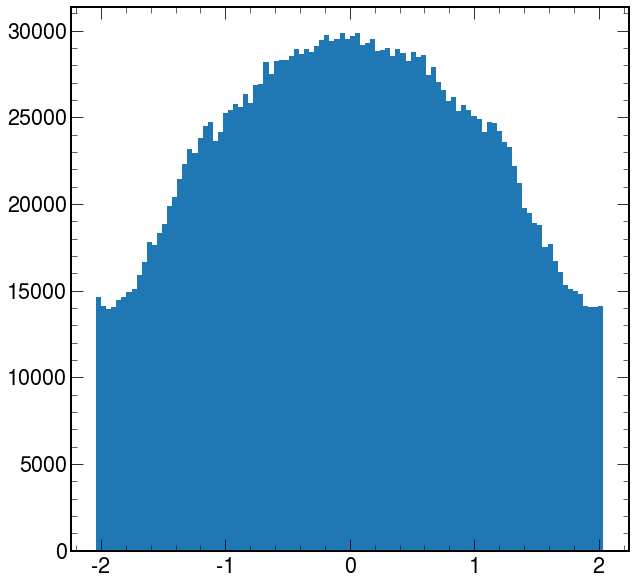

In [12]:
plt.hist(qcd_example.float()[:,0].numpy(),bins=100)

(array([21131., 21341., 21160., 21045., 22239., 22299., 23075., 23655.,
        25310., 27086., 29476., 29685., 31493., 32936., 34620., 35488.,
        38006., 40600., 42610., 42588., 44502., 46548., 47124., 45879.,
        48417., 49403., 50563., 51319., 51915., 53445., 53701., 55279.,
        55876., 58470., 58496., 59591., 59888., 60564., 61697., 61091.,
        62666., 62390., 62987., 63510., 63710., 64482., 64227., 65072.,
        65442., 64984., 65492., 65478., 65185., 64529., 64832., 63517.,
        62837., 62607., 62153., 62398., 61037., 61321., 60922., 59754.,
        60380., 58760., 58495., 55356., 54840., 53319., 52825., 51942.,
        51232., 50291., 49827., 48561., 46673., 47544., 46283., 44651.,
        43488., 42299., 40091., 38148., 35023., 34095., 32528., 31775.,
        30044., 29656., 27294., 26025., 24179., 23186., 23112., 22726.,
        21302., 21239., 20869., 20256.]),
 array([-2.03906250e+00, -1.99830079e+00, -1.95753908e+00, -1.91677737e+00,
        -1.8760156

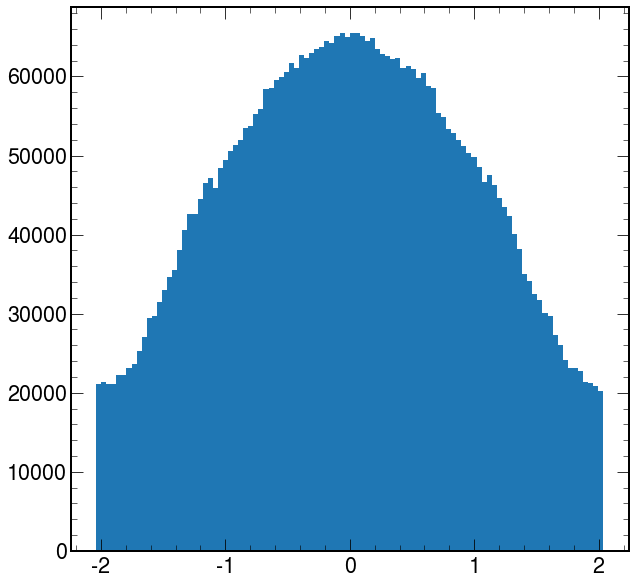

In [13]:
plt.hist(tt_example.float()[:,0].numpy(),bins=100)

(array([9.06528e+05, 6.78080e+05, 5.72103e+05, 4.79383e+05, 3.96958e+05,
        3.20581e+05, 2.57701e+05, 2.01558e+05, 1.61047e+05, 1.25251e+05,
        9.75200e+04, 7.66530e+04, 6.08250e+04, 4.74250e+04, 3.75520e+04,
        3.03210e+04, 2.41660e+04, 1.95010e+04, 1.57720e+04, 1.29230e+04,
        1.07930e+04, 8.73500e+03, 7.60600e+03, 6.20000e+03, 5.24400e+03,
        4.60600e+03, 3.75600e+03, 3.41600e+03, 2.76100e+03, 2.38300e+03,
        2.20600e+03, 1.91000e+03, 1.63900e+03, 1.52300e+03, 1.25100e+03,
        1.24100e+03, 1.01000e+03, 9.61000e+02, 8.53000e+02, 8.41000e+02,
        7.04000e+02, 7.14000e+02, 6.40000e+02, 5.24000e+02, 5.10000e+02,
        4.45000e+02, 3.99000e+02, 4.13000e+02, 3.44000e+02, 2.99000e+02,
        2.70000e+02, 2.63000e+02, 2.09000e+02, 2.29000e+02, 1.98000e+02,
        1.76000e+02, 1.94000e+02, 1.71000e+02, 1.58000e+02, 1.31000e+02,
        1.17000e+02, 1.12000e+02, 1.08000e+02, 9.50000e+01, 9.70000e+01,
        9.10000e+01, 8.00000e+01, 7.60000e+01, 5.70

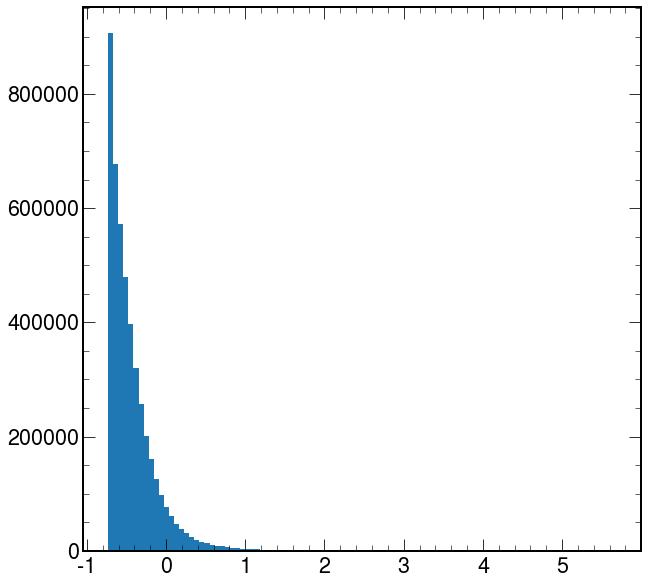

In [21]:
plt.hist(tt_example.float()[:,1].numpy(),bins=100)

(array([1622509.,   11328.,   20585.,   29243.,   35257.,   41871.,
          44510.,   49370.,   49906.,   52872.,   54199.,   53162.,
          54778.,   53511.,   53877.,   53237.,   53076.,   51224.,
          50420.,   50129.,   49879.,   47651.,   46845.,   45810.,
          45875.,   43925.,   43119.,   42238.,   42467.,   40564.,
          40484.,   38640.,   37936.,   37436.,   37477.,   35576.,
          34893.,   35205.,   33499.,   33029.,   33399.,   31396.,
          31555.,   29945.,   30853.,   30173.,   28141.,   29154.,
          28677.,   26825.,   27646.,   27122.,   25591.,   26337.,
          25886.,   24103.,   25041.,   24553.,   23437.,   24041.,
          23563.,   22338.,   23123.,   22741.,   21543.,   21967.,
          20688.,   21621.,   20519.,   20947.,   20790.,   20449.,
          20242.,   19095.,   19774.,   18840.,   19258.,   18336.,
          18531.,   18704.,   18584.,   18405.,   17302.,   17581.,
          17100.,   18423.,   16861.,   16508., 

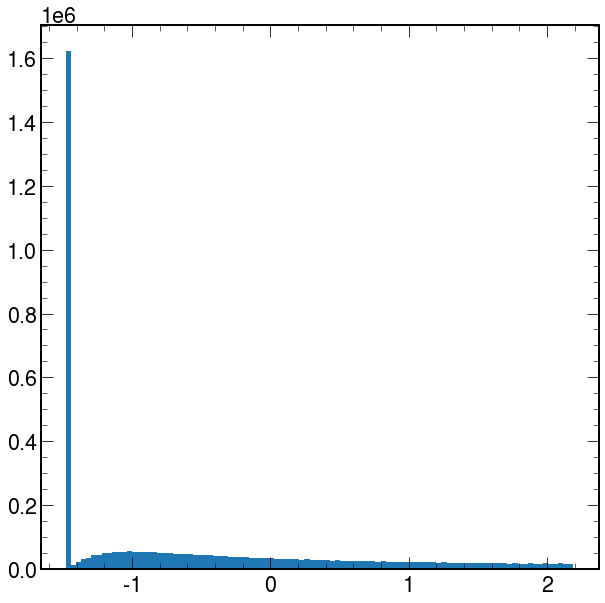

In [22]:
plt.hist(tt_example.float()[:,14].numpy(),bins=100)

[ 1.283   0.4724 -0.357  ... -0.4128 -0.868  -0.136 ]


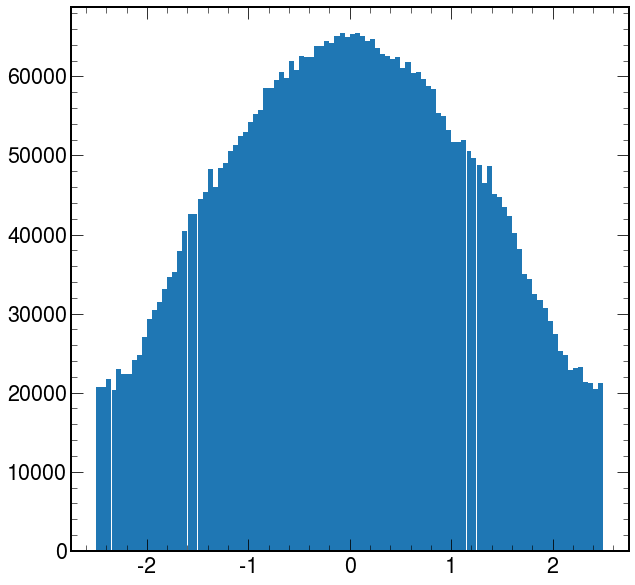

[ 49.72 111.94  36.6  ...  26.58  58.78  52.53]


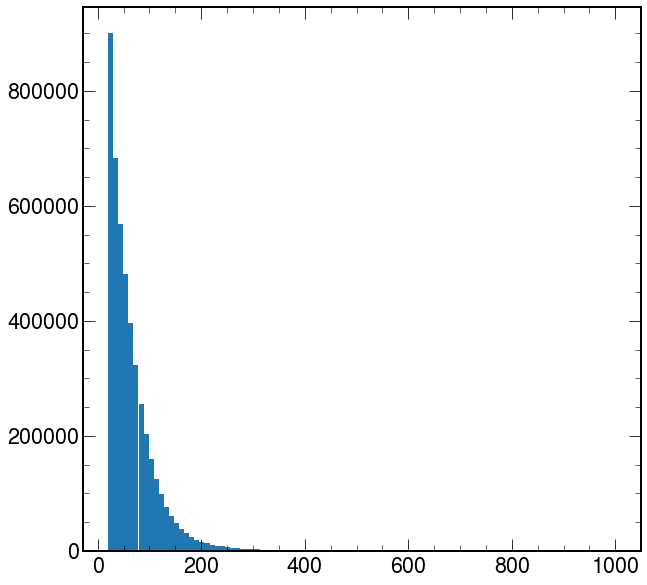

[1.998 1.998 1.998 ... 1.998 1.998 1.998]


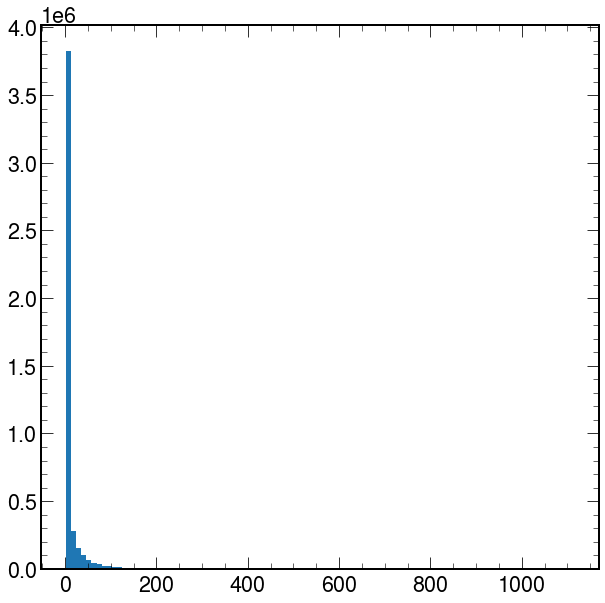

[0.00924 0.00924 0.00924 ... 0.00924 0.00924 0.00924]


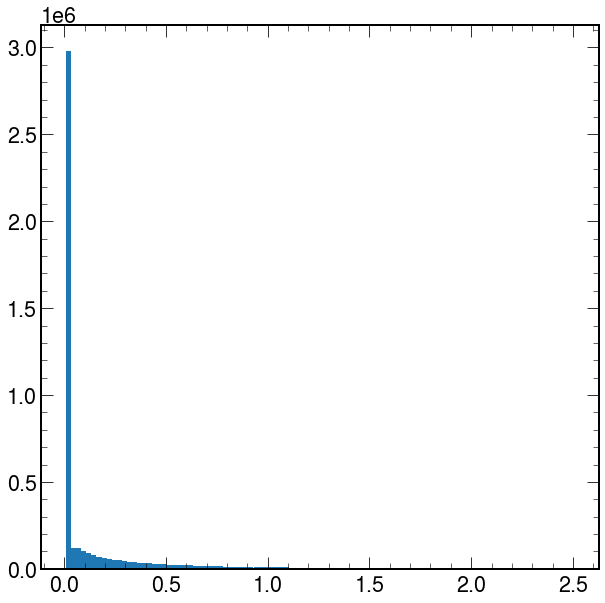

[0.2299 0.2299 0.2299 ... 0.2299 0.2299 0.2299]


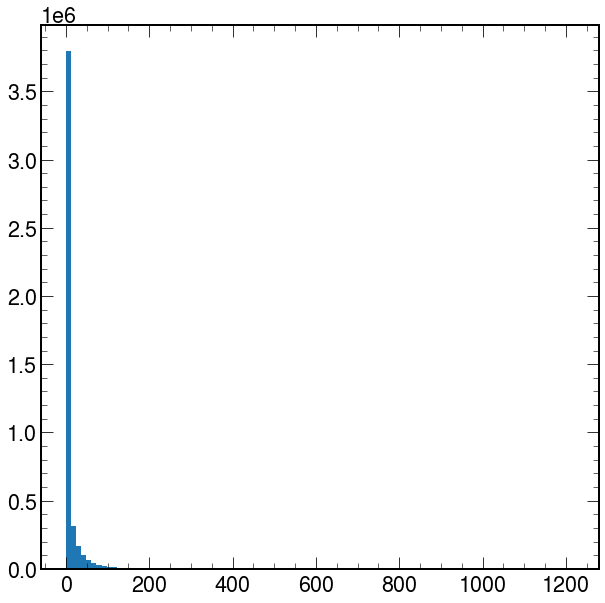

[0.009735 0.009735 0.009735 ... 0.009735 0.009735 0.009735]


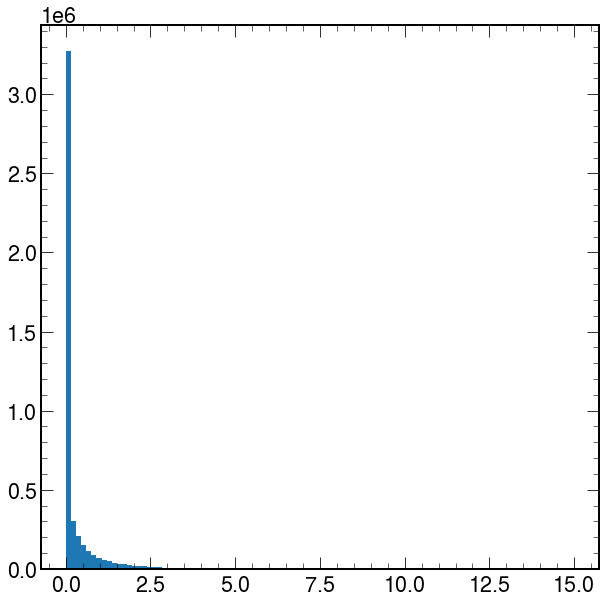

[0.05685  0.0917   0.01657  ... 0.01218  0.0527   0.009735]


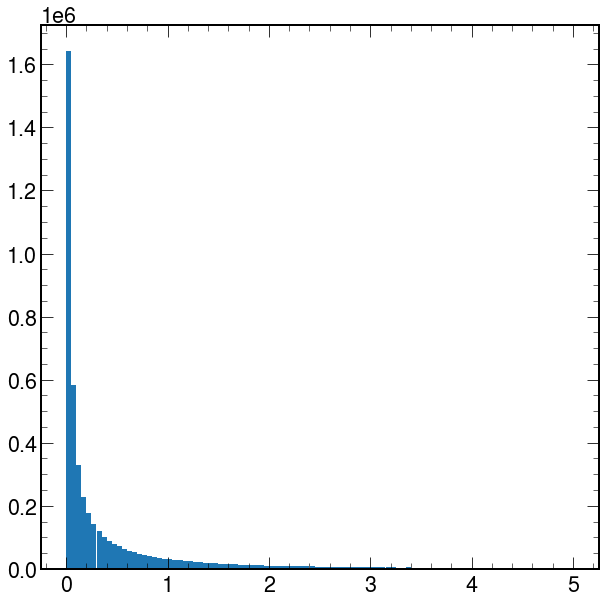

[ 0.0847    0.0065    0.03665  ...  0.003202  0.06635  -0.00107 ]


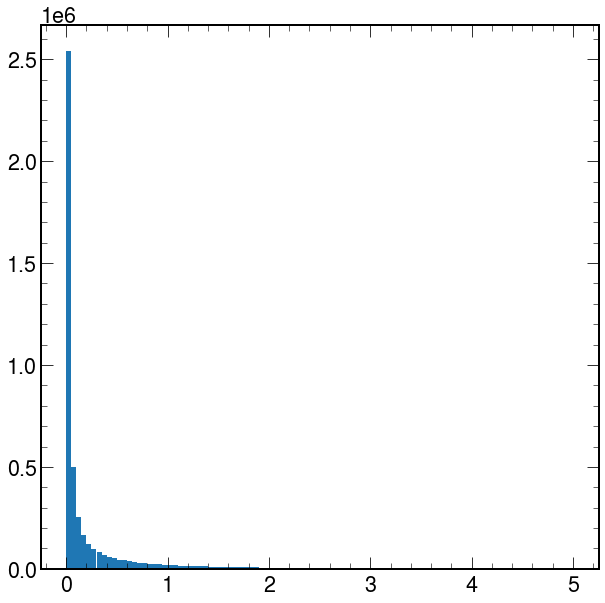

[-0.00093  0.1405   0.07465 ...  0.02562  0.05548 -0.00093]


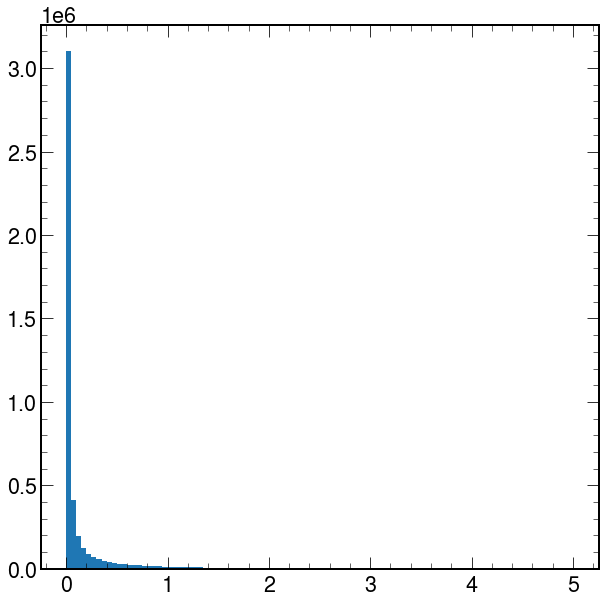

[-0.000981 -0.000981 -0.000981 ...  0.03482   0.01581  -0.000981]


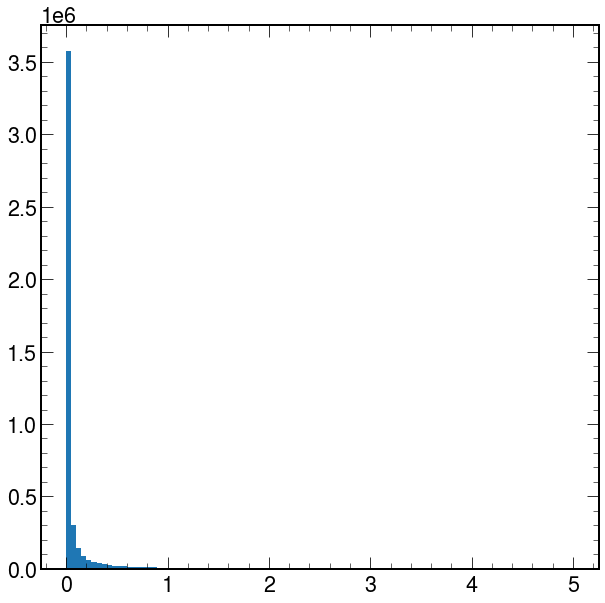

[-9.408e-04 -9.408e-04 -9.408e-04 ...  1.681e+00  2.588e-01 -9.408e-04]


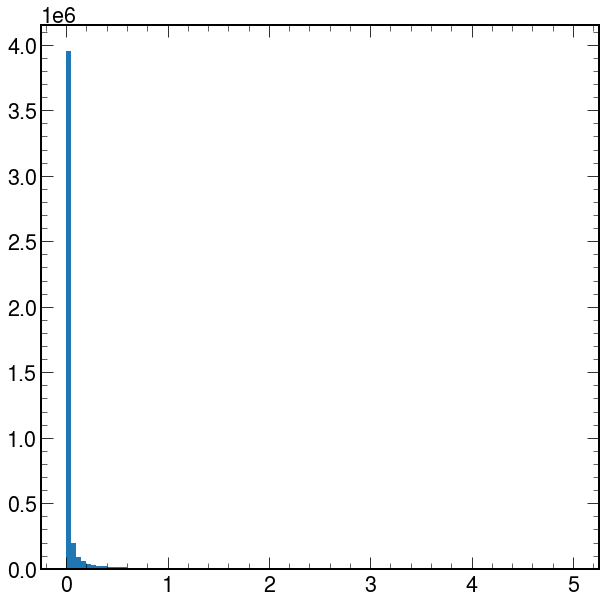

[-0.001029 -0.001029 -0.001029 ... -0.001029  0.01772  -0.001029]


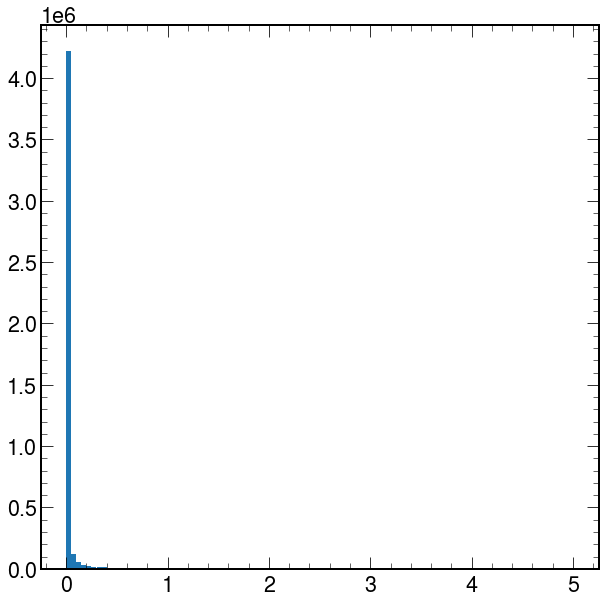

[0.01145 0.05563 0.1279  ... 0.289   0.0483  0.01444]


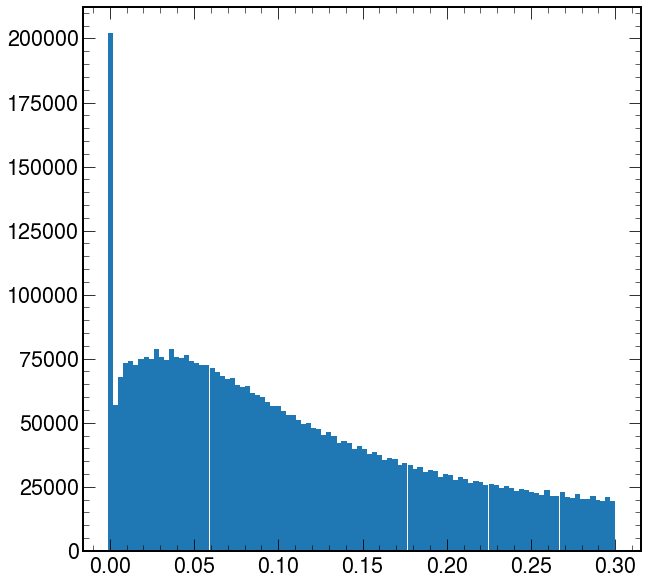

[ 0.2915    0.05627   0.075    ...  0.2815    0.052    -0.000903]


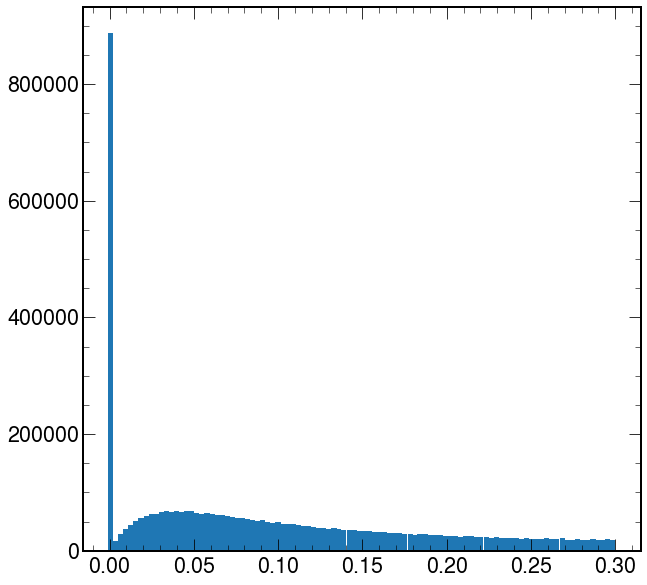

[-0.0009685  0.03375    0.0986    ...  0.08466    0.0343    -0.0009685]


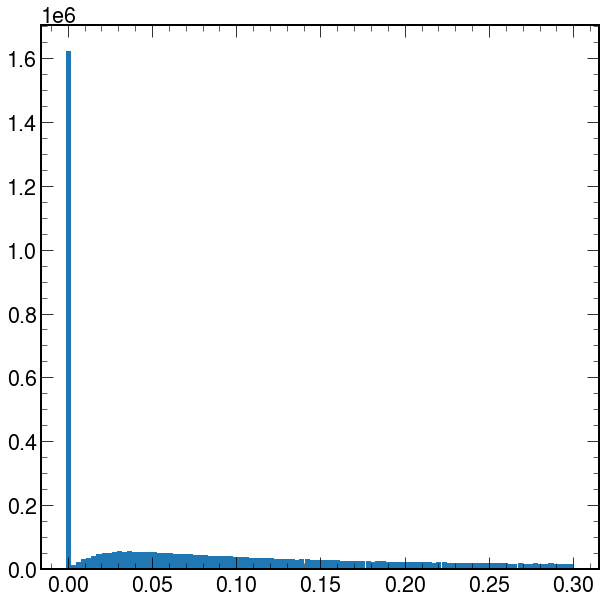

[-0.00097 -0.00097 -0.00097 ...  0.05096  0.10297 -0.00097]


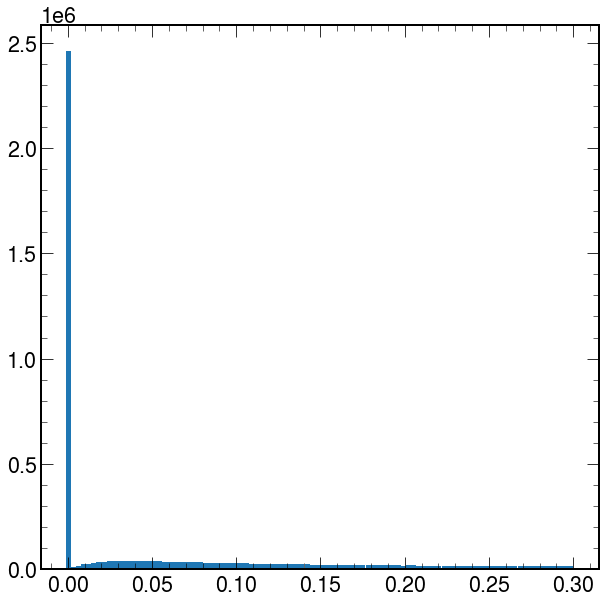

[-0.0009017 -0.0009017 -0.0009017 ...  0.2291     0.03833   -0.0009017]


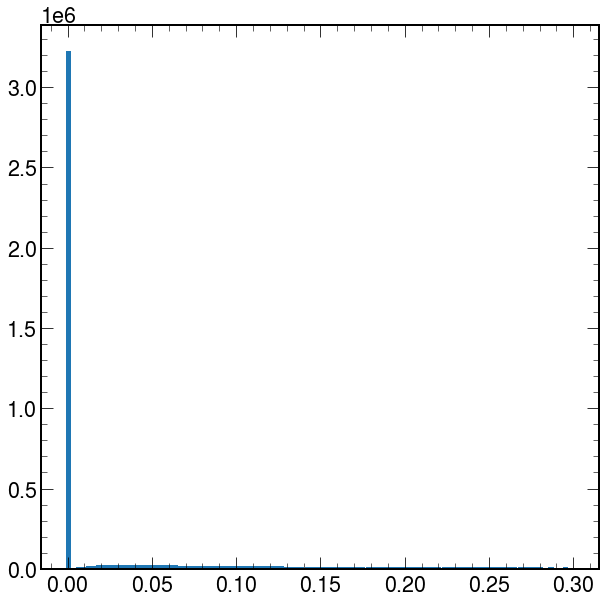

[-0.0009437 -0.0009437 -0.0009437 ... -0.0009437  0.1515    -0.0009437]


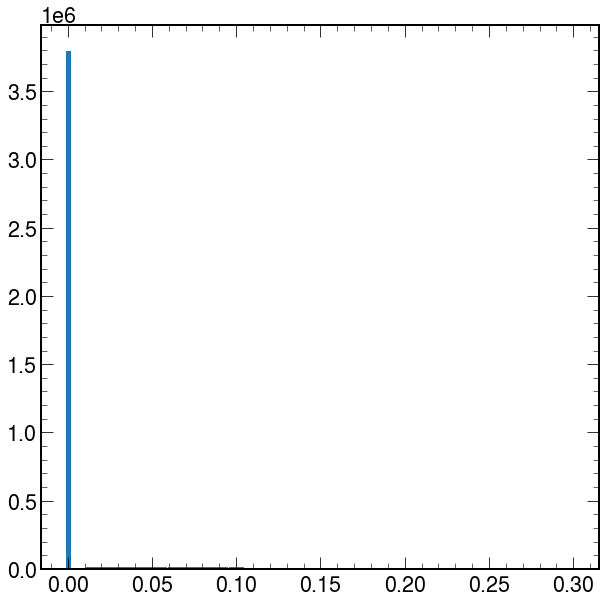

[-4.78 -4.78 -4.78 ... -4.78 -4.78 -4.78]


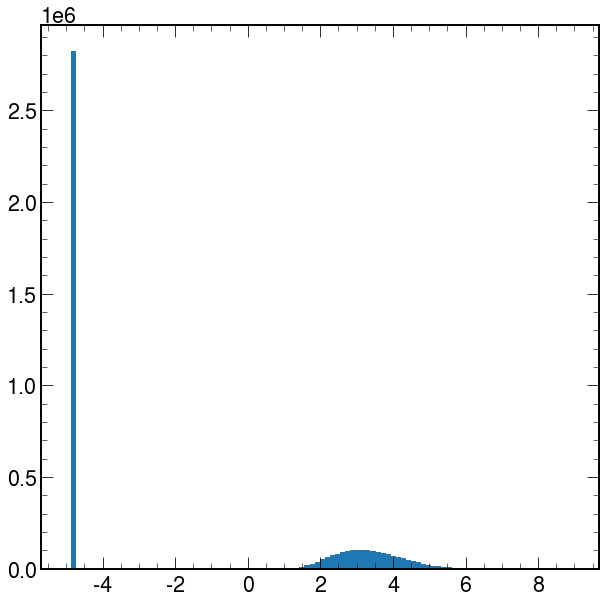

[-4.664 -4.664 -4.664 ... -4.664 -4.664 -4.664]


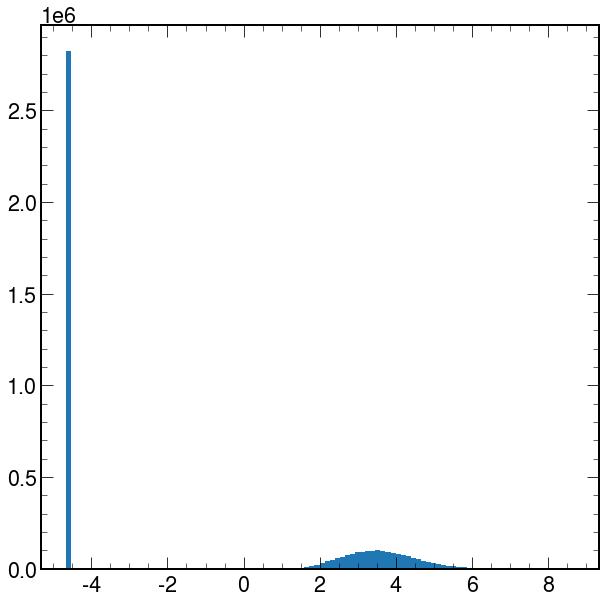

[-3.916 -3.916 -3.916 ... -3.916 -3.916 -3.916]


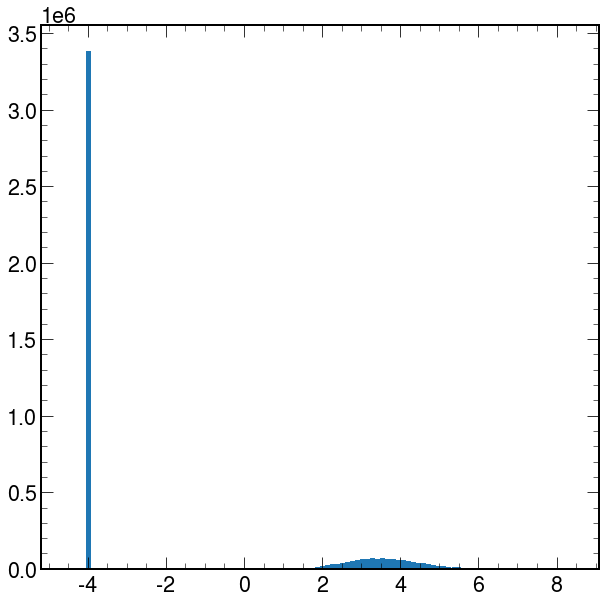

[-4.297 -4.297 -4.297 ... -4.297 -4.297 -4.297]


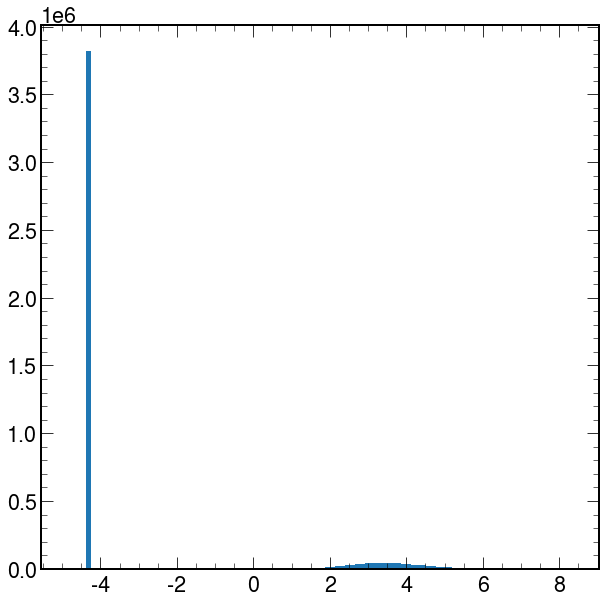

[-0.0002756 -0.001512  -0.004612  ... -0.0006266 -0.001489  -0.001401 ]


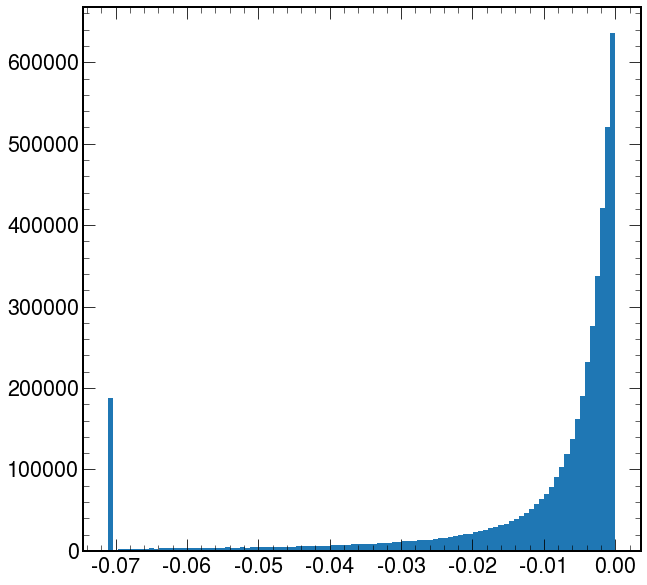

[-0.0663   -0.002562 -0.003572 ... -0.0015   -0.002638 -0.071   ]


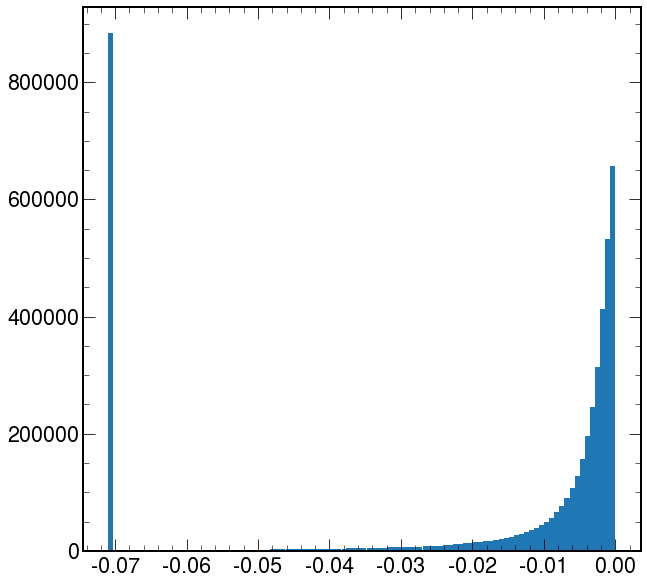

[-7.098e-02 -9.346e-03 -1.128e-03 ... -1.010e-02 -5.978e-05 -7.098e-02]


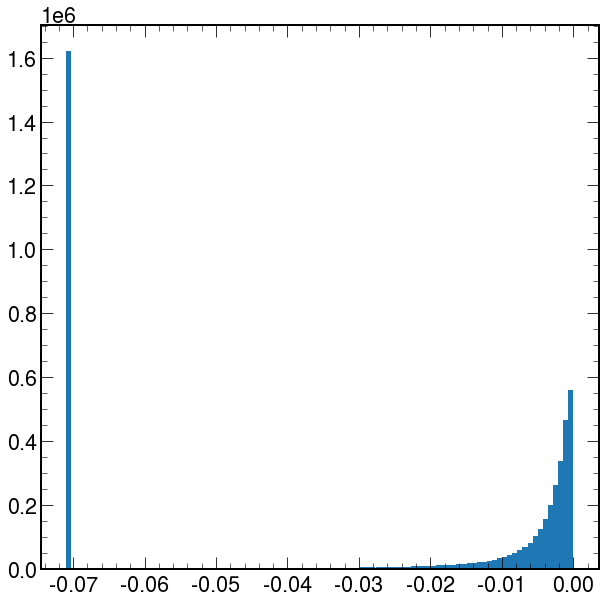

[-0.071   -0.071   -0.071   ... -0.00282 -0.00079 -0.071  ]


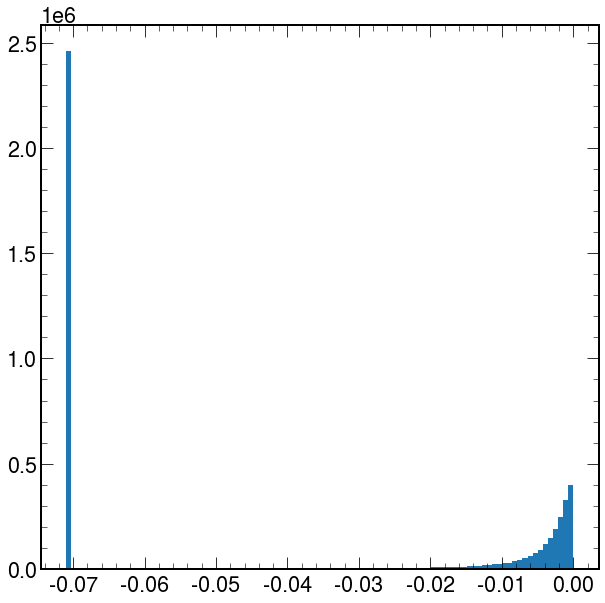

[-0.07104  -0.07104  -0.07104  ... -0.05606  -0.002083 -0.07104 ]


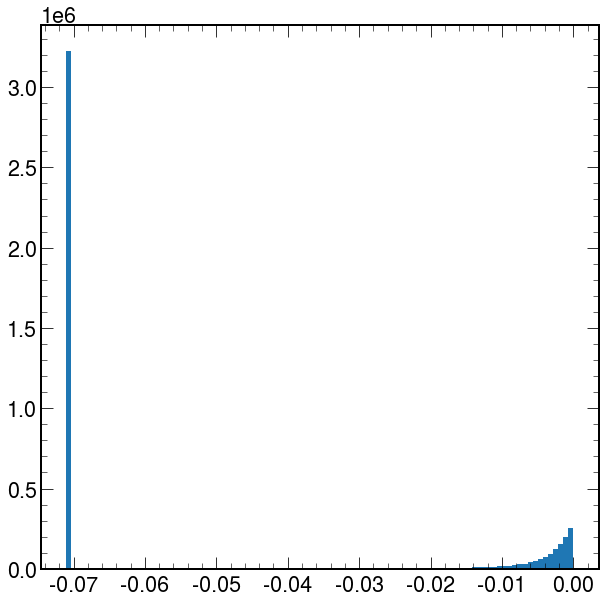

[-0.071   -0.071   -0.071   ... -0.071   -0.00839 -0.071  ]


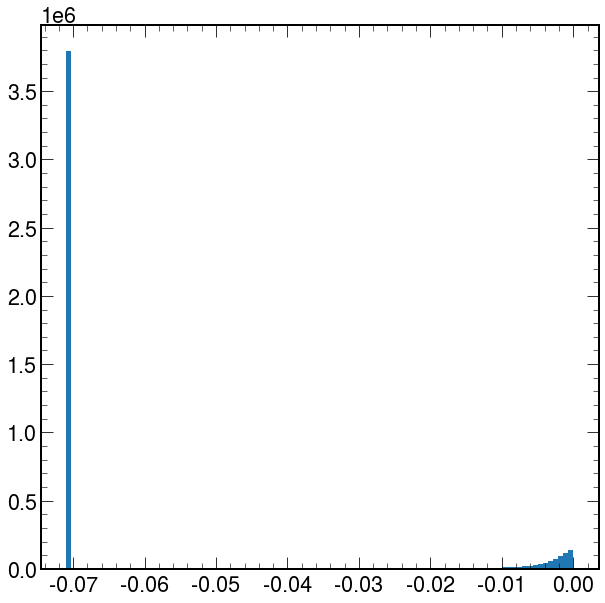

[41.06 68.25 17.4  ... 13.77 30.47 46.75]


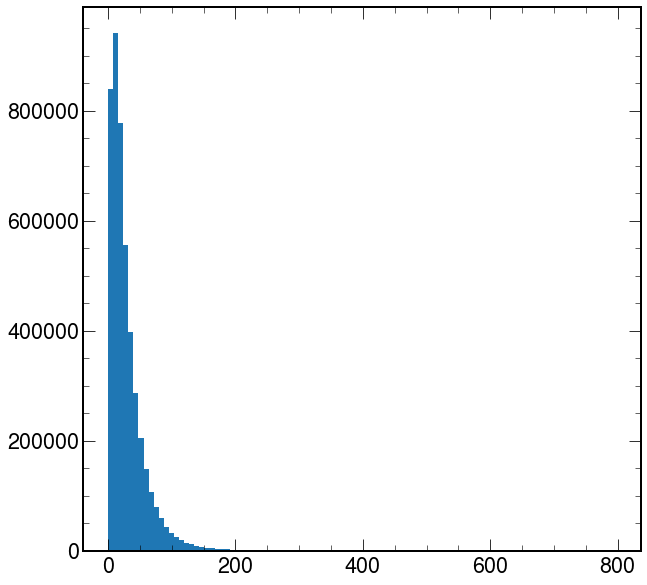

[0.005848 0.0495   0.1177   ... 0.2688   0.035    0.014244]


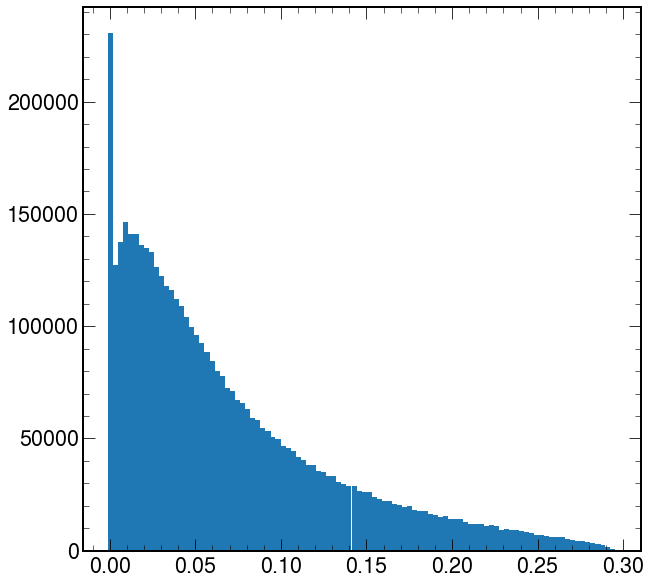

[ 0.1478    0.05112   0.0695   ...  0.2502    0.0373   -0.000984]


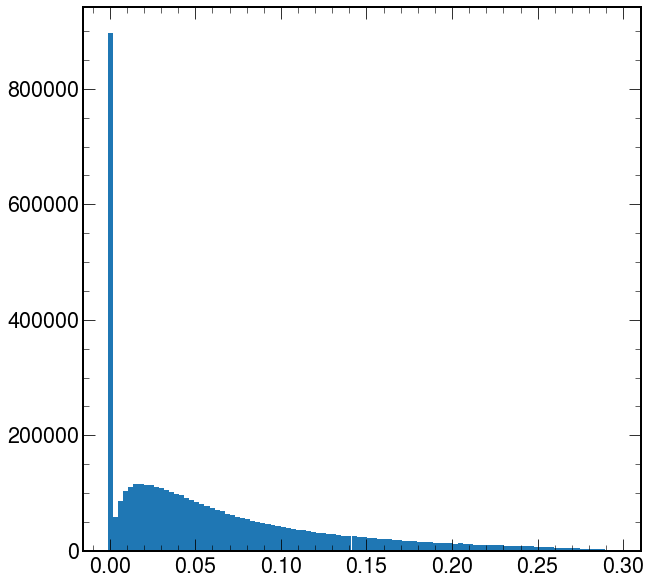

[-0.001006  0.03052   0.0912   ...  0.0776    0.02444  -0.001006]


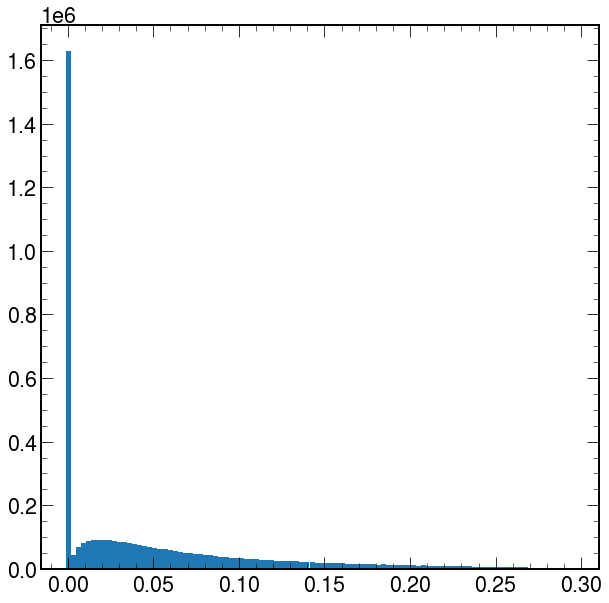

[-0.0009522 -0.0009522 -0.0009522 ...  0.0471     0.07196   -0.0009522]


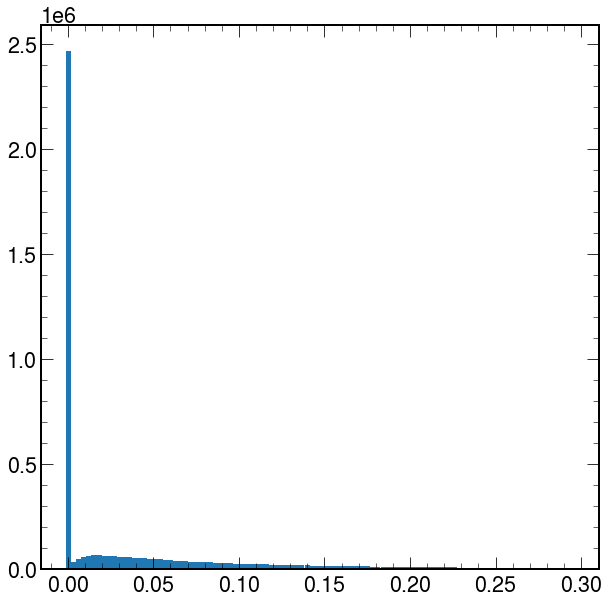

[-0.0009227 -0.0009227 -0.0009227 ...  0.217      0.02708   -0.0009227]


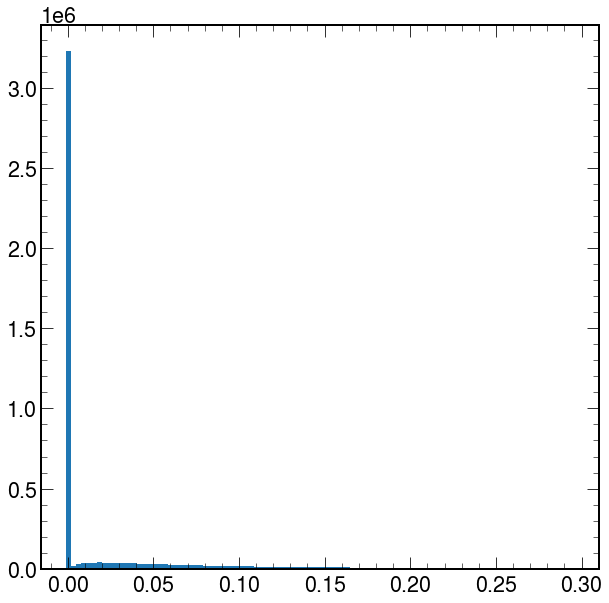

[-0.0009413 -0.0009413 -0.0009413 ... -0.0009413  0.1023    -0.0009413]


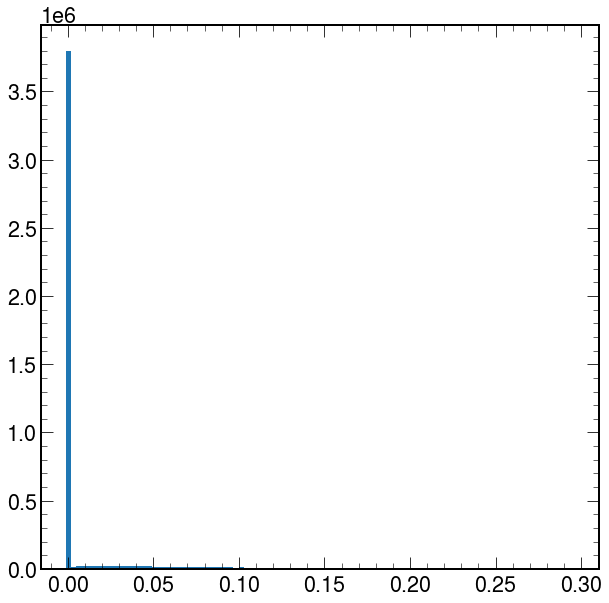

[0.4473 0.1962 1.784  ... 1.401  0.587  0.672 ]


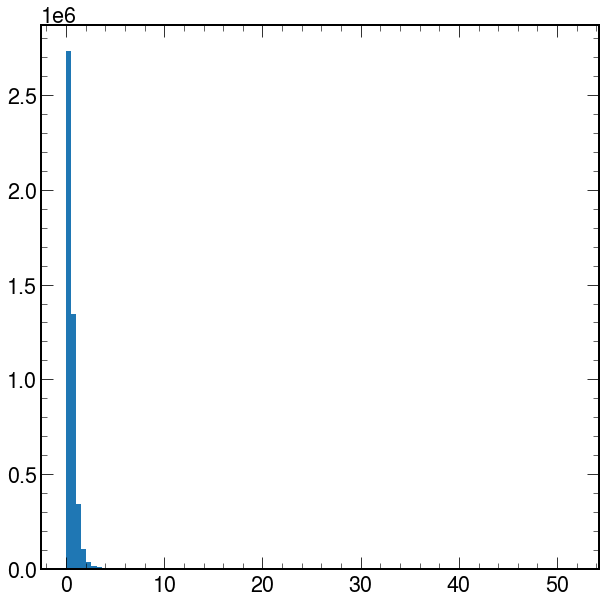

[ 0.5884    0.629     0.1906   ...  0.919     0.2115   -0.001106]


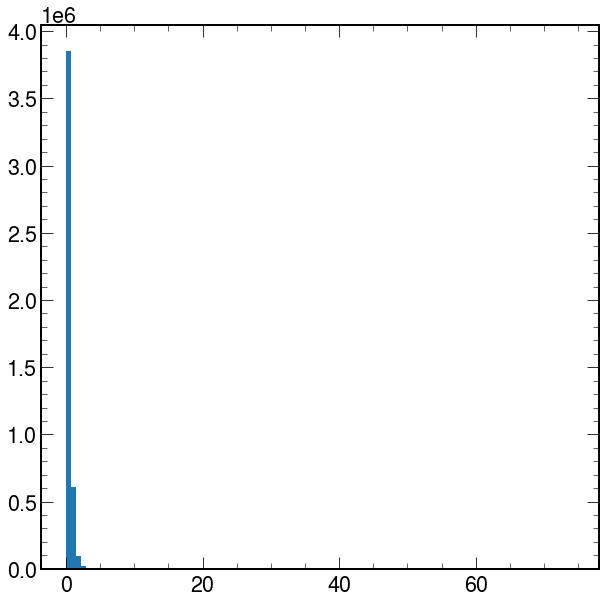

[-1.1930e-03  1.7910e+00  1.1914e-01 ...  2.2388e-01  2.4097e-01
 -1.1930e-03]


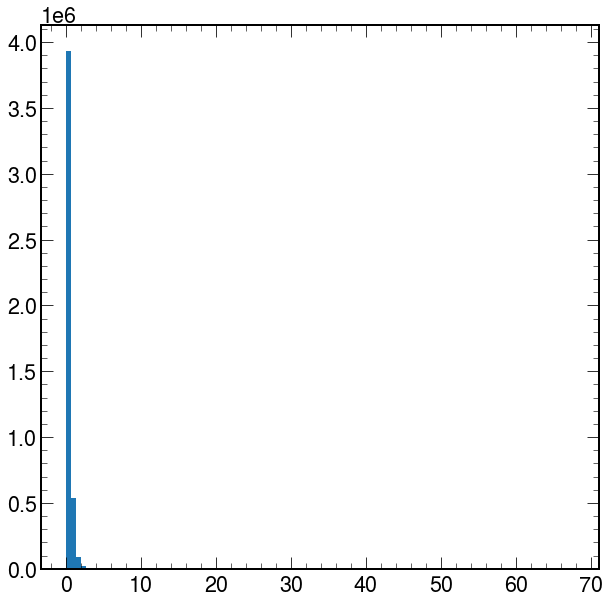

[-0.000962 -0.000962 -0.000962 ...  0.09106   0.3723   -0.000962]


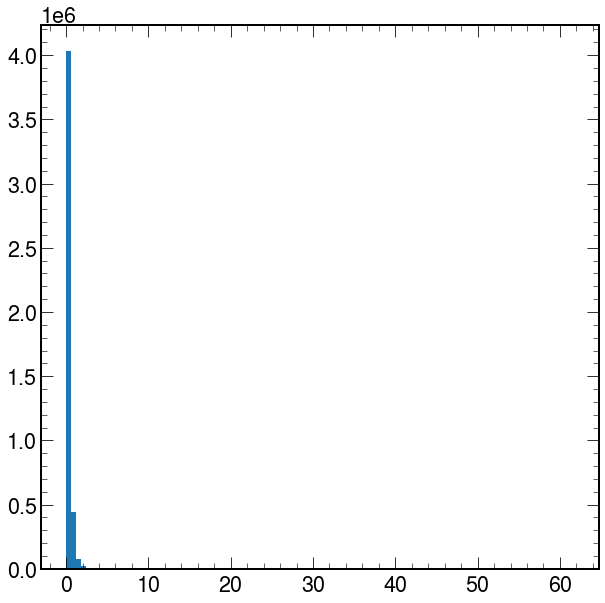

[-0.000462 -0.000462 -0.000462 ...  0.308     0.07983  -0.000462]


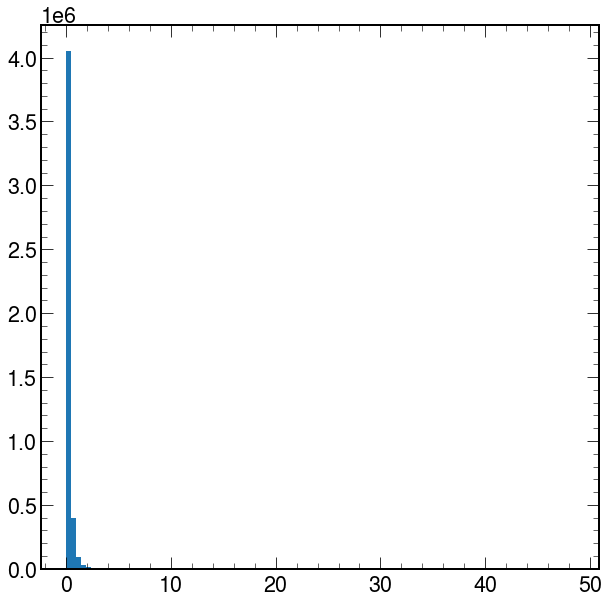

[-0.000692 -0.000692 -0.000692 ... -0.000692  0.2284   -0.000692]


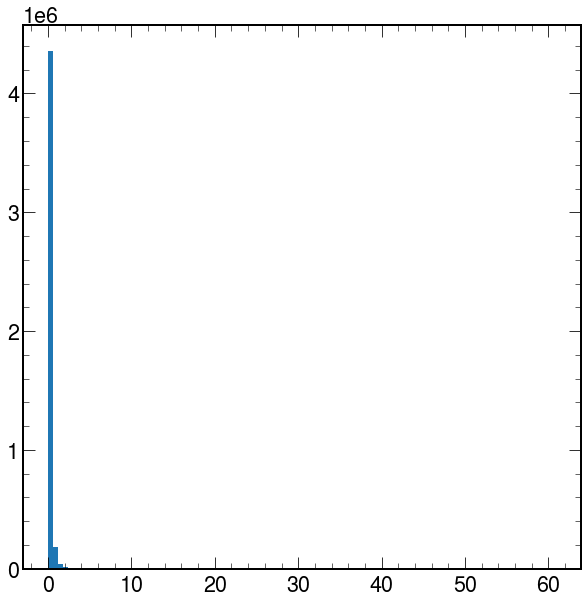

[ 1.338e-01 -3.869e+00 -1.163e+00 ...  5.566e-02  1.807e-01 -7.650e+01]


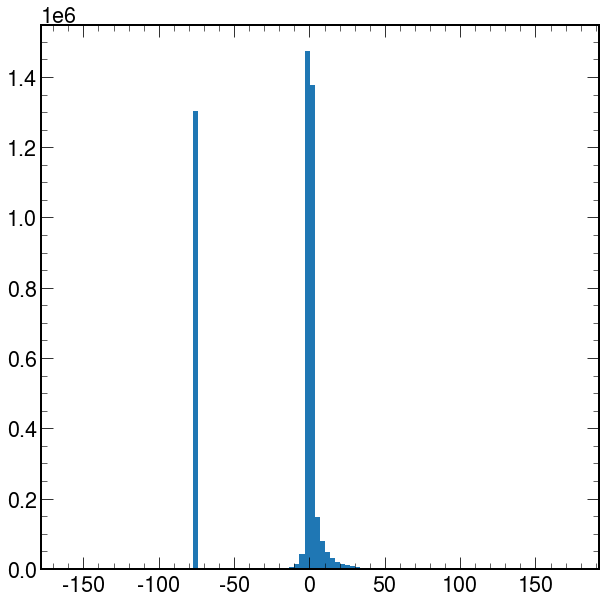

[0.1837 0.99   1.851  ... 1.006  0.957  0.791 ]


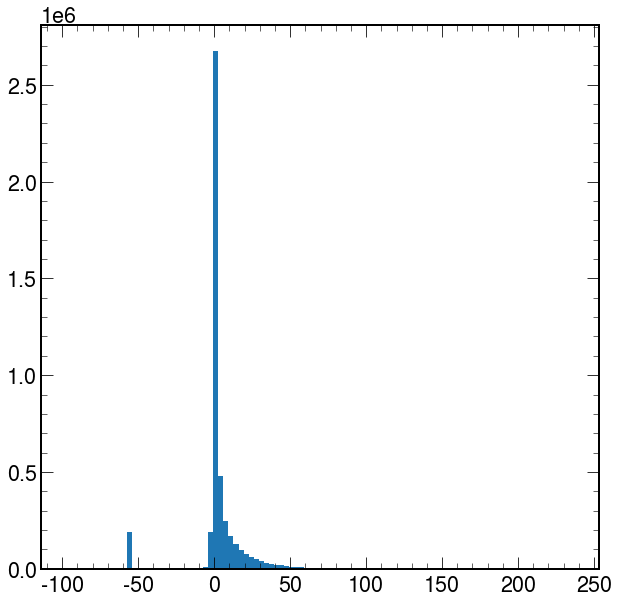

[-2.154e+00 -1.885e+00  1.654e+00 ...  5.273e-02  9.004e-01 -6.228e+01]


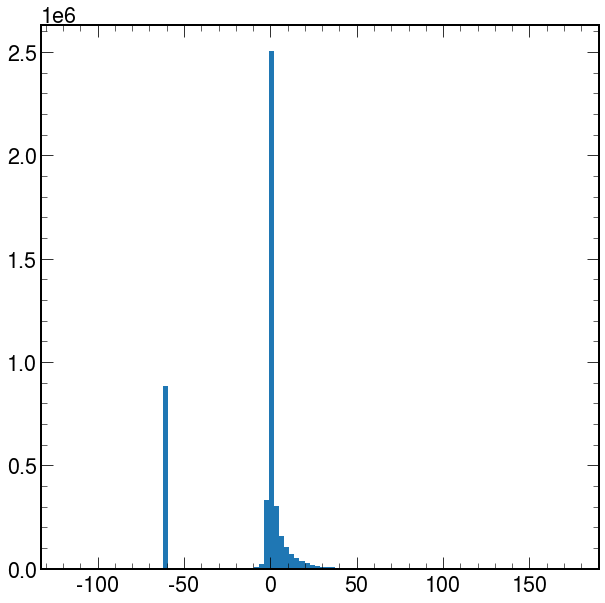

[-6.756e+01 -3.865e+00 -1.163e+00 ... -4.568e-02  5.322e-01 -6.756e+01]


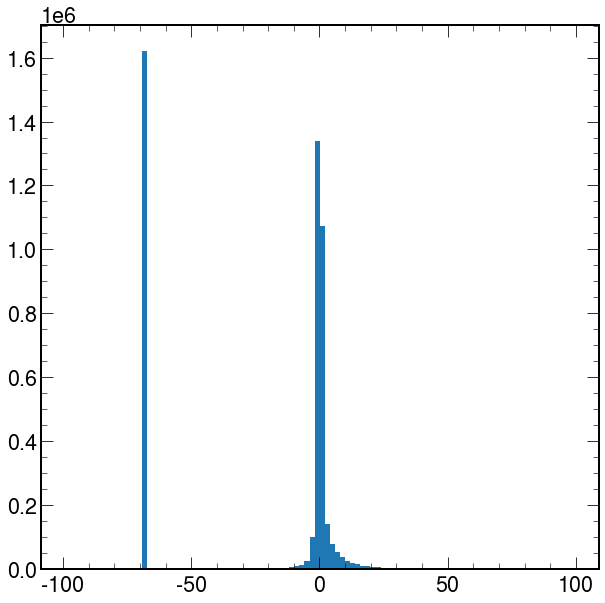

[-69.5     -69.5     -69.5     ...  -0.07355   0.1764  -69.5    ]


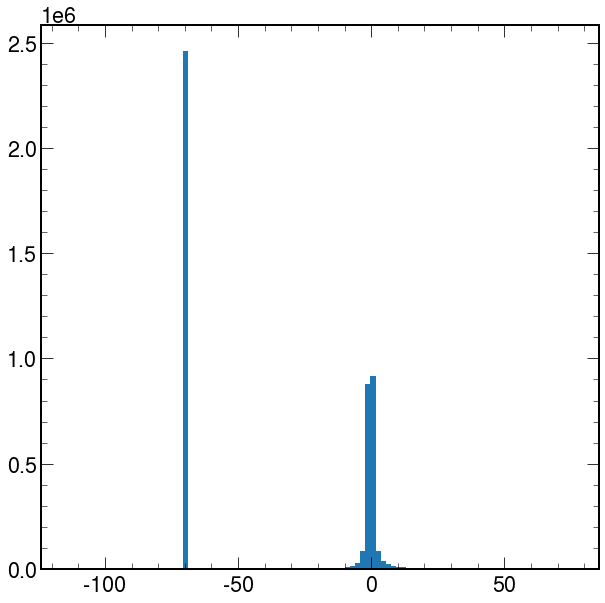

[-71.75   -71.75   -71.75   ...  -0.3447  -0.751  -71.75  ]


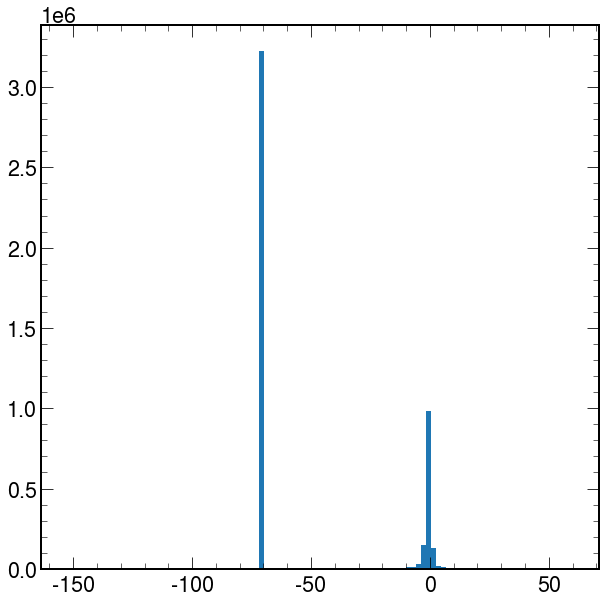

[-65.8   -65.8   -65.8   ... -65.8    -1.523 -65.8  ]


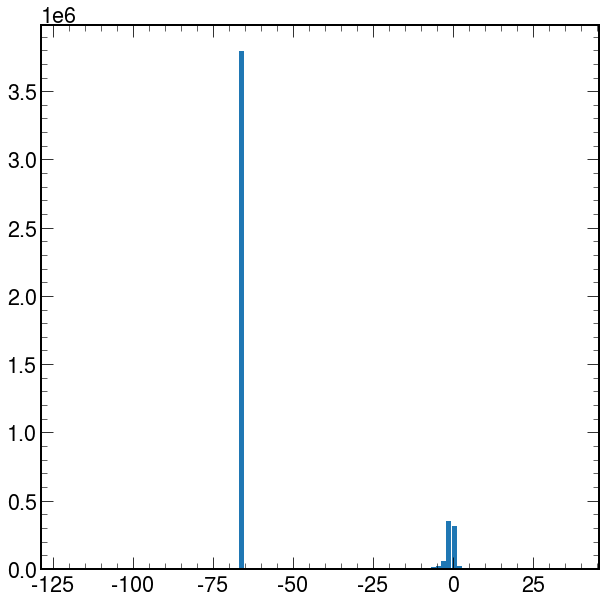

[ 9.184e-04 -8.728e-03 -5.184e-03 ...  1.860e-04  5.522e-04 -1.001e+00]


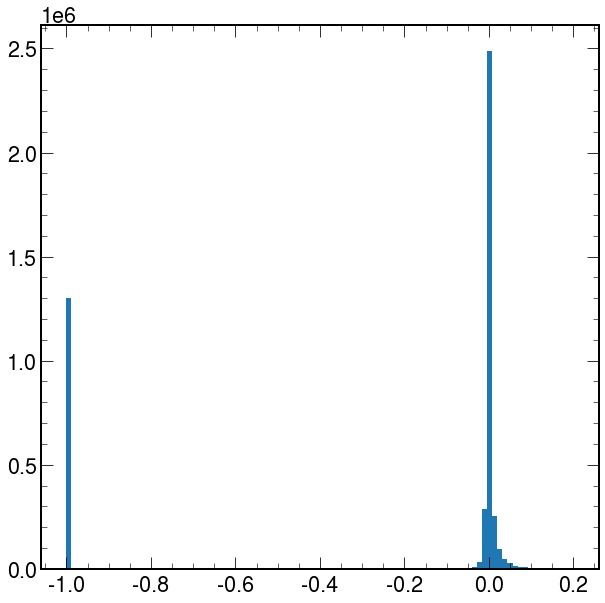

[  -2.053   -1.928   -3.115 ...    1.01     0.51  -475.2  ]


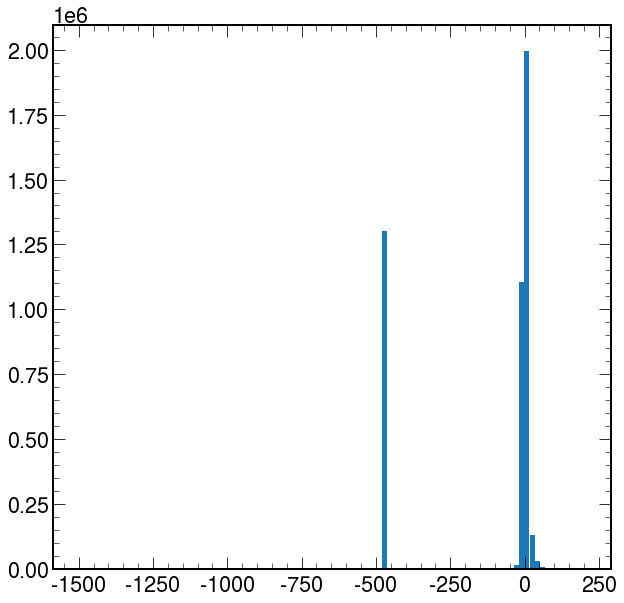

[ 0.3174  1.995  -3.145  ...  0.995   1.155   0.7373]


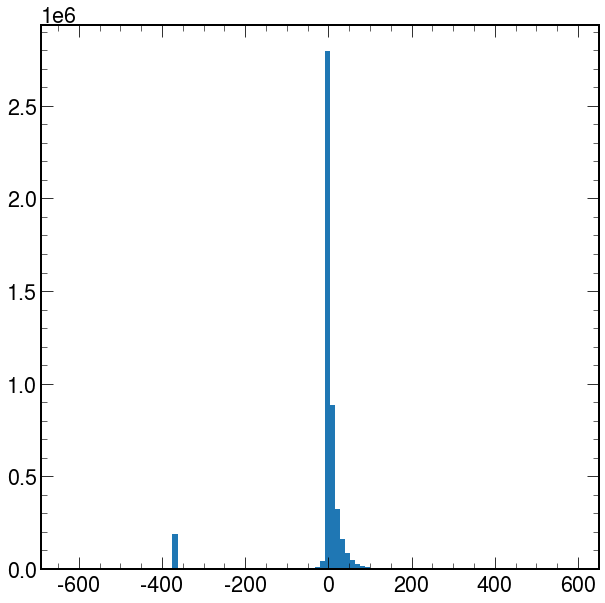

[ -15.516   -1.89     1.72  ...    0.719    1.063 -332.5  ]


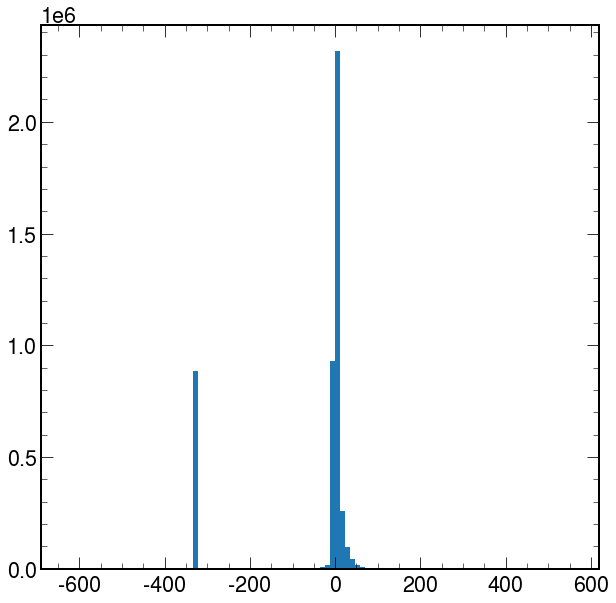

[-323.8      4.97    -1.53  ...    3.346    0.532 -323.8  ]


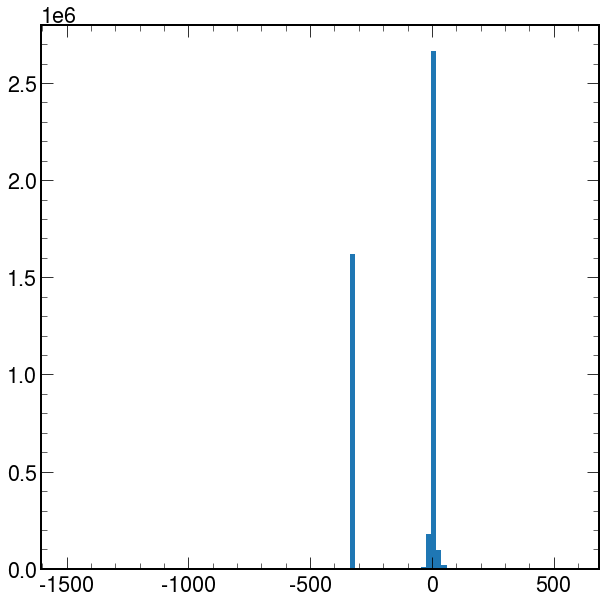

[-282.8    -282.8    -282.8    ...   -0.8823    0.555  -282.8   ]


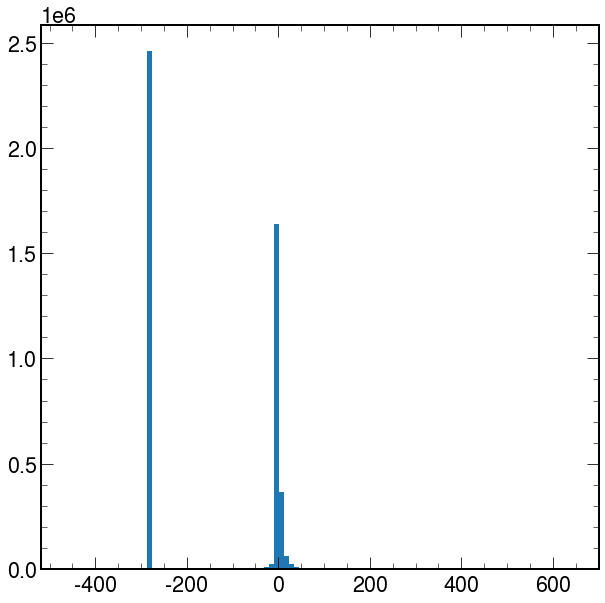

[-280.    -280.    -280.    ...   63.22    -1.919 -280.   ]


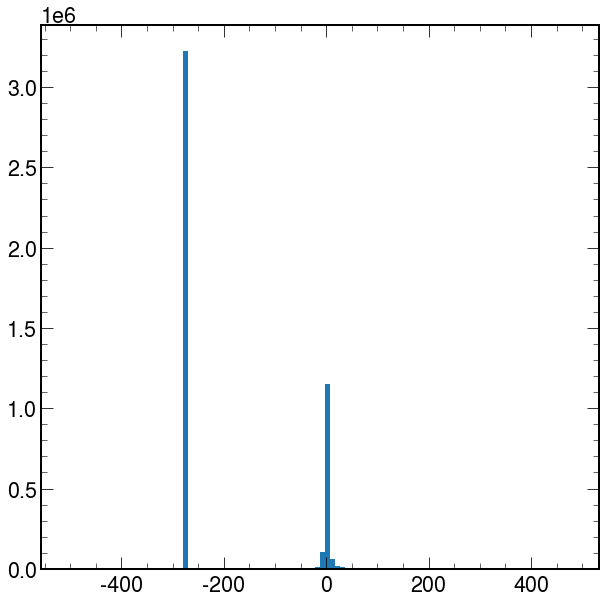

[-235.6   -235.6   -235.6   ... -235.6     -1.526 -235.6  ]


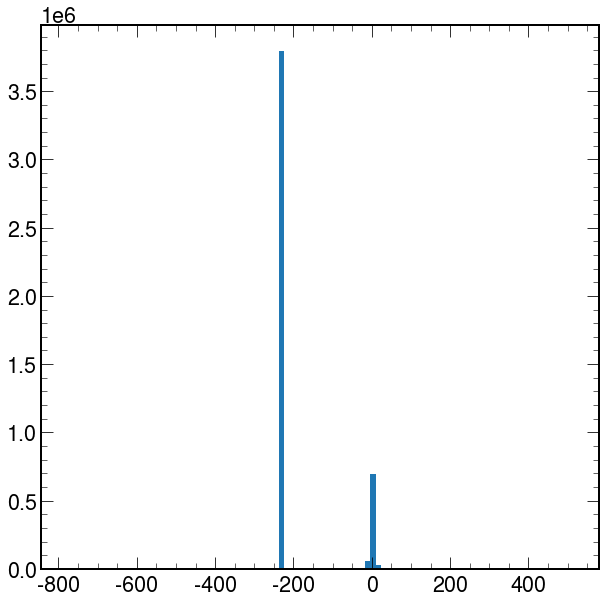

[-1.013e-02 -2.562e-03 -5.005e-03 ...  3.298e-03  1.344e-03 -1.892e+00]


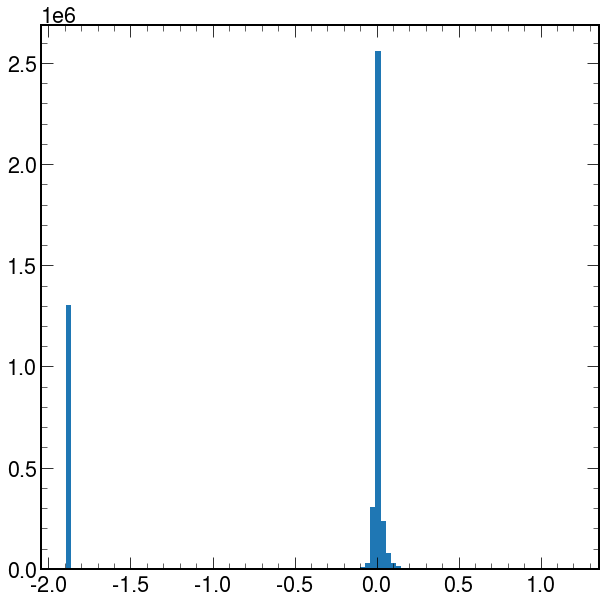

[0.003582 0.0335   0.1111   ... 0.04196  0.006786 0.01438 ]


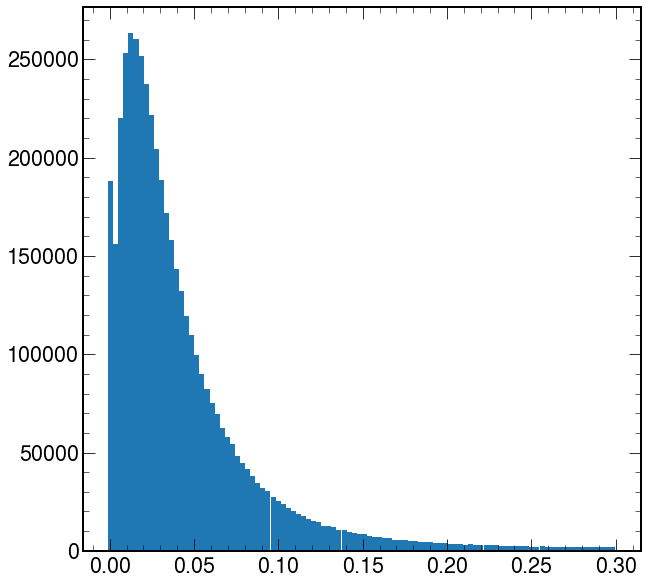

[0.858  0.624  0.5874 ... 0.4492 0.5044 0.909 ]


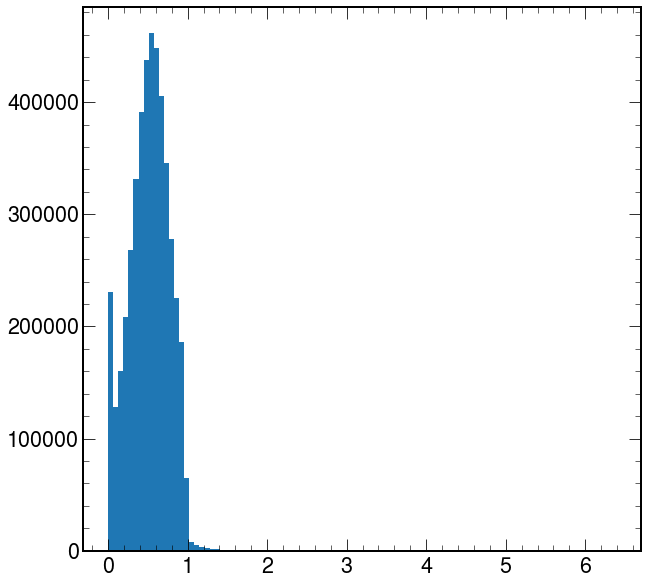

[2. 2. 2. ... 2. 2. 2.]


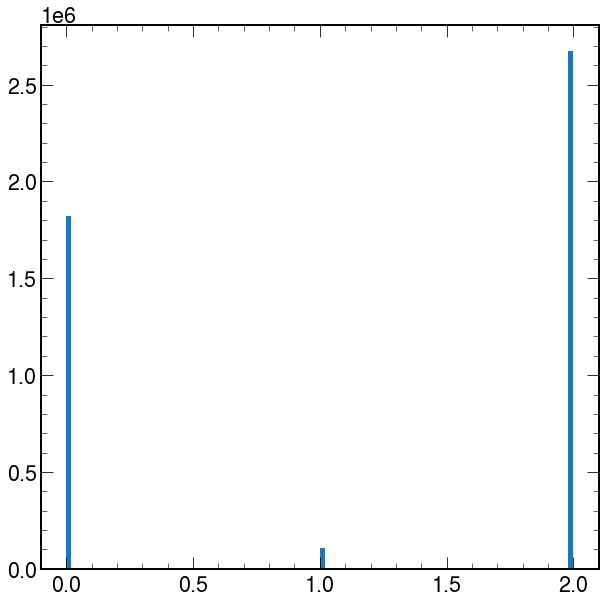

[0.004593 0.004593 0.004593 ... 0.004593 0.004593 0.004593]


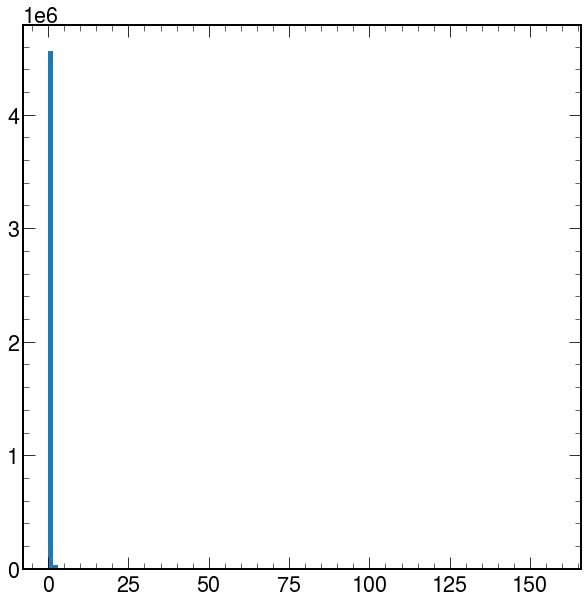

[-0.0009546 -0.0009546 -0.0009546 ... -0.0009546 -0.0009546 -0.0009546]


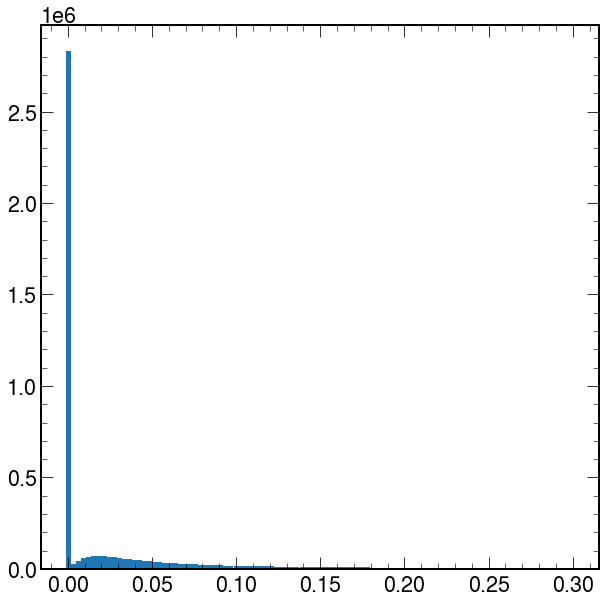

[0.06586 0.06586 0.06586 ... 0.06586 0.06586 0.06586]


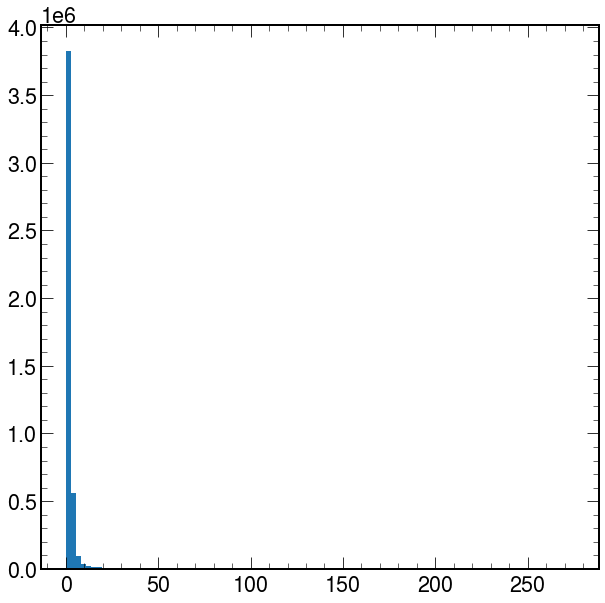

[-0.0001273 -0.0001273 -0.0001273 ... -0.0001273 -0.0001273 -0.0001273]


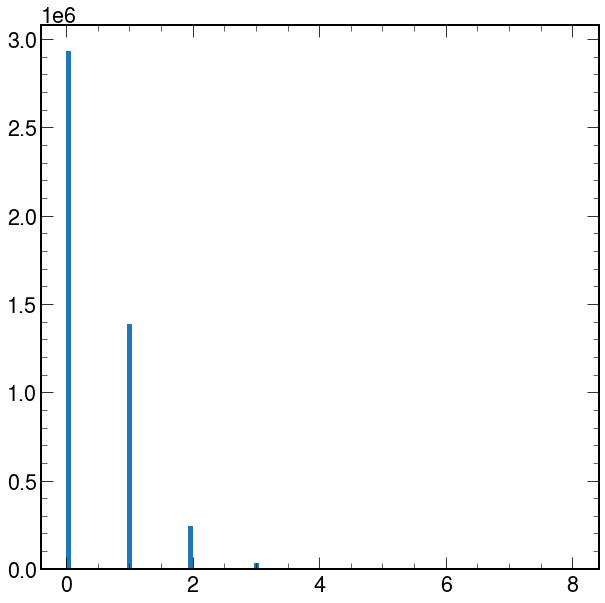

[1.999 3.    3.    ... 5.    6.    0.999]


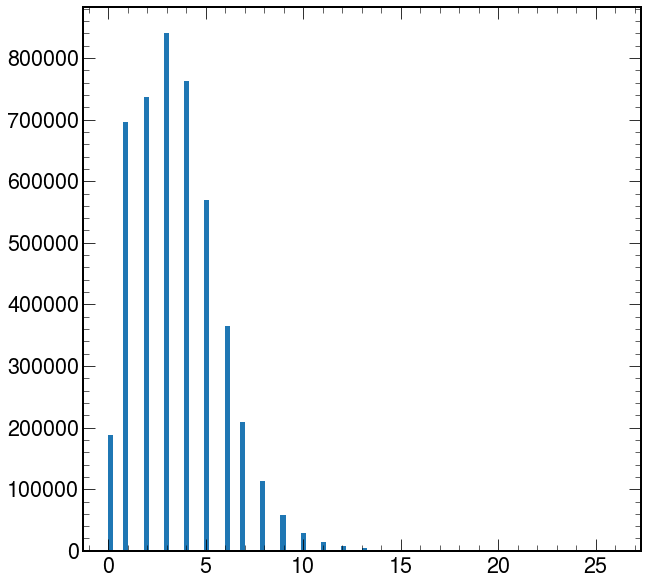

[3.743e-05 3.743e-05 3.743e-05 ... 3.743e-05 3.743e-05 3.743e-05]


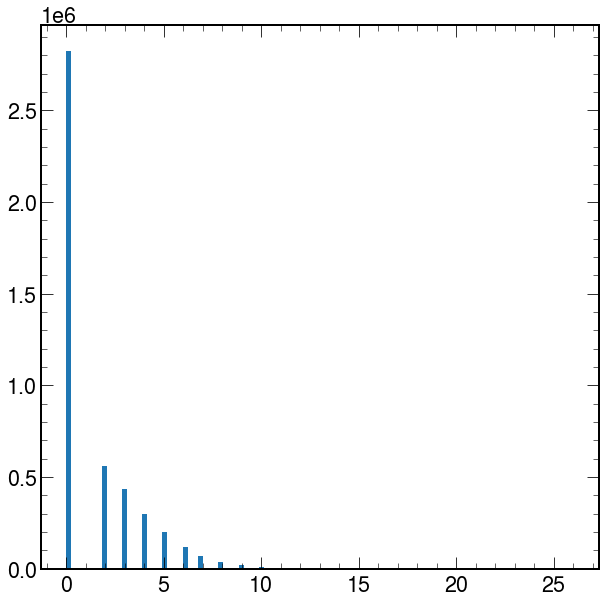

[3.743e-05 3.743e-05 3.743e-05 ... 3.743e-05 3.743e-05 3.743e-05]


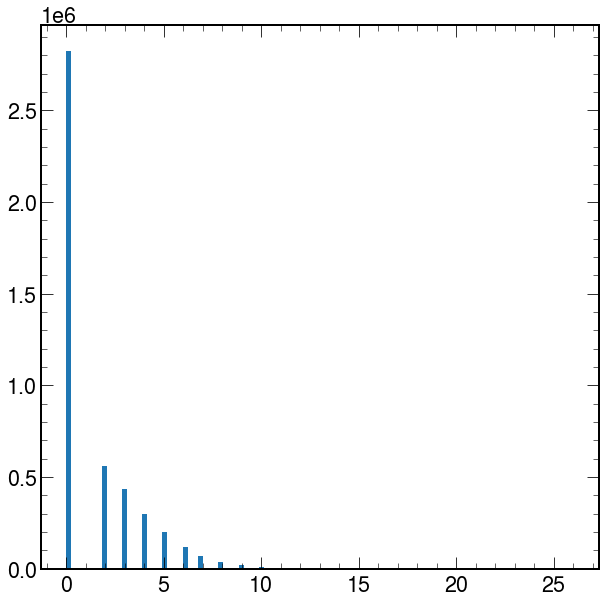

In [25]:
for prop in range(0,67):
    scaler = torch.load(f'/hpcwork/um106329/june_21/scaler_{prop}_with_default_{default}.pt')
    scaled_back = scaler.inverse_transform(tt_example[:,prop])
    print(scaled_back)
    plt.hist(scaled_back, bins = 100)
    plt.show()

In [35]:
display_names = ['Jet $\eta$',
                'Jet $p_T$',
                'Flight Distance 2D Sig','Flight Distance 2D Val','Flight Distance 3D Sig', 'Flight Distance 3D Val',
                'Track Decay Len Val [0]','Track Decay Len Val [1]','Track Decay Len Val [2]','Track Decay Len Val [3]','Track Decay Len Val [4]','Track Decay Len Val [5]',
                'Track $\Delta R$ [0]','Track $\Delta R$ [1]','Track $\Delta R$ [2]','Track $\Delta R$ [3]','Track $\Delta R$ [4]','Track $\Delta R$ [5]',
                'Track $\eta_{rel}$ [0]','Track $\eta_{rel}$ [1]','Track $\eta_{rel}$ [2]','Track $\eta_{rel}$ [3]',
                'Track Jet Dist Val [0]','Track Jet Dist Val [1]','Track Jet Dist Val [2]','Track Jet Dist Val [3]','Track Jet Dist Val [4]','Track Jet Dist Val [5]',
                'Track Jet $p_T$',
                'Track $p_T$ Ratio [0]','Track $p_T$ Ratio [1]','Track $p_T$ Ratio [2]','Track $p_T$ Ratio [3]','Track $p_T$ Ratio [4]','Track $p_T$ Ratio [5]',
                'Track $p_{T,rel}$ [0]','Track $p_{T,rel}$ [1]','Track $p_{T,rel}$ [2]','Track $p_{T,rel}$ [3]','Track $p_{T,rel}$ [4]','Track $p_{T,rel}$ [5]',
                'Track SIP 2D Sig Above Charm',
                'Track SIP 2D Sig [0]','Track SIP 2D Sig [1]','Track SIP 2D Sig [2]','Track SIP 2D Sig [3]','Track SIP 2D Sig [4]','Track SIP 2D Sig [5]',
                'Track SIP 2D Val Above Charm',
                'Track SIP 3D Sig Above Charm',
                'Track SIP 3D Sig [0]','Track SIP 3D Sig [1]','Track SIP 3D Sig [2]','Track SIP 3D Sig [3]','Track SIP 3D Sig [4]','Track SIP 3D Sig [5]',
                'Track SIP 3D Val Above Charm',
                'Track Sum Jet $\Delta R$','Track Sum Jet $E_T$ Ratio',
                'Vertex Category','Vertex Energy Ratio','Vertex Jet $\Delta R$','Vertex Mass',
                'Jet N Secondary Vertices','Jet N Selected Tracks','Jet N Tracks $\eta_{rel}$','Vertex N Tracks',]

## Example: june_21

tensor([-0.6040, -0.6040, -0.6040,  ..., -0.6040, -0.6040, -0.6040],
       dtype=torch.float16)
tensor([-0.6040,  1.0225, -0.6040,  ...,  1.0225, -0.6040, -0.6040],
       dtype=torch.float16)


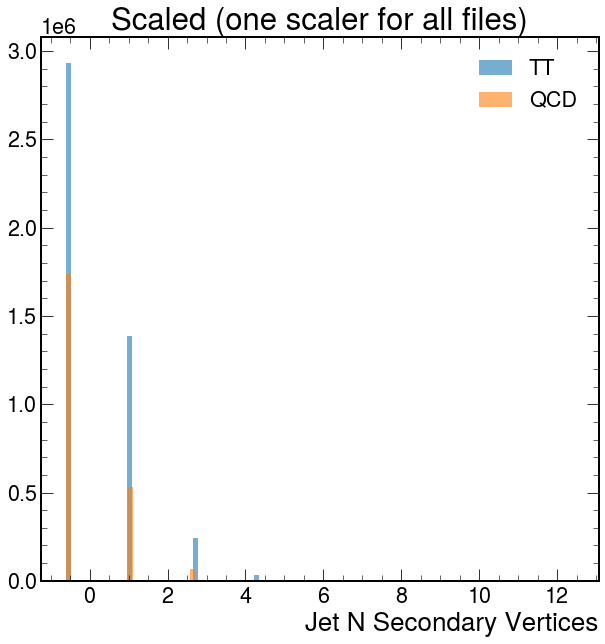

[-0.0001273 -0.0001273 -0.0001273 ... -0.0001273 -0.0001273 -0.0001273]
[-1.273e-04  9.995e-01 -1.273e-04 ...  9.995e-01 -1.273e-04 -1.273e-04]


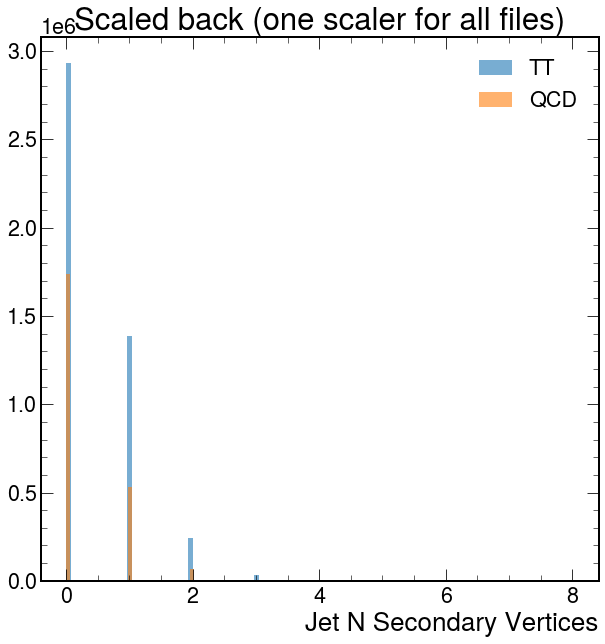

tensor([-0.9624, -0.6450, -0.6450,  ..., -0.0108,  0.3064, -1.2793],
       dtype=torch.float16)
tensor([-0.3279,  0.3064,  0.6235,  ..., -0.9624, -1.2793,  0.6235],
       dtype=torch.float16)


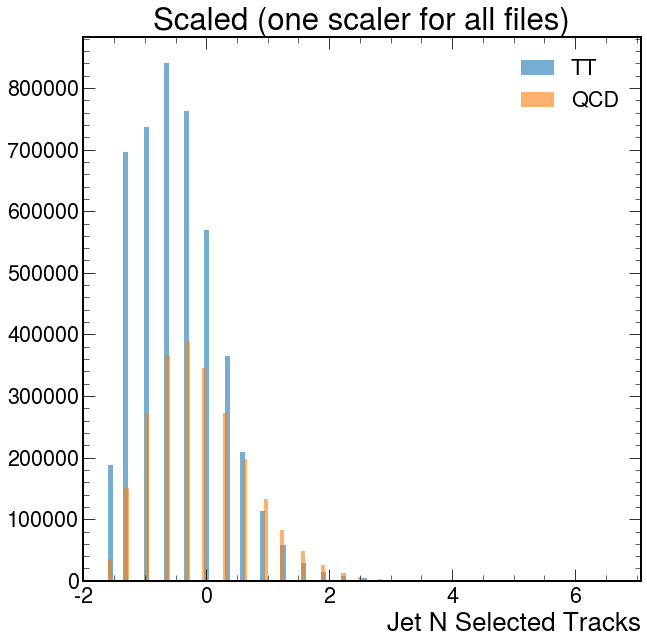

[1.999 3.    3.    ... 5.    6.    0.999]
[4.    6.    7.    ... 1.999 0.999 7.   ]


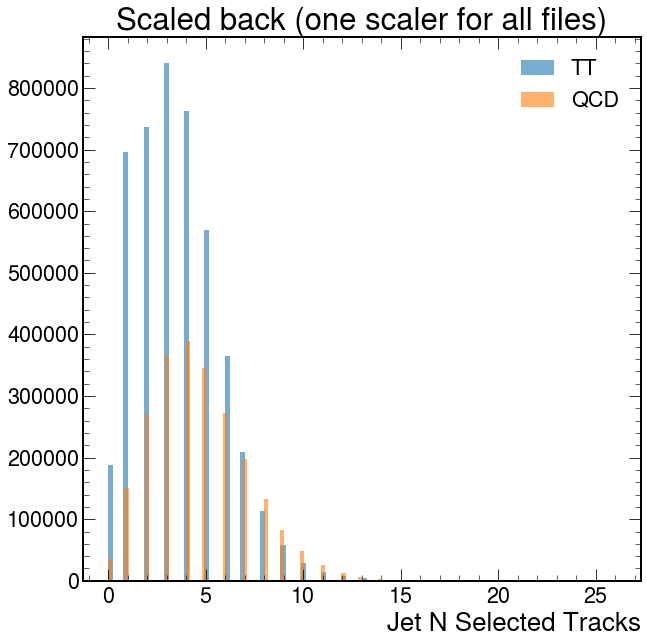

tensor([-0.5884, -0.5884, -0.5884,  ..., -0.5884, -0.5884, -0.5884],
       dtype=torch.float16)
tensor([-0.5884,  1.7441, -0.5884,  ...,  0.3450, -0.5884, -0.5884],
       dtype=torch.float16)


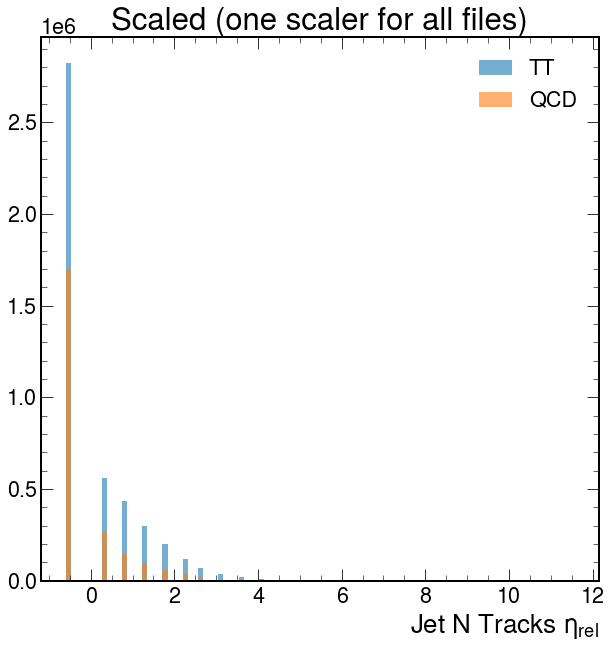

[3.743e-05 3.743e-05 3.743e-05 ... 3.743e-05 3.743e-05 3.743e-05]
[3.743e-05 5.000e+00 3.743e-05 ... 2.000e+00 3.743e-05 3.743e-05]


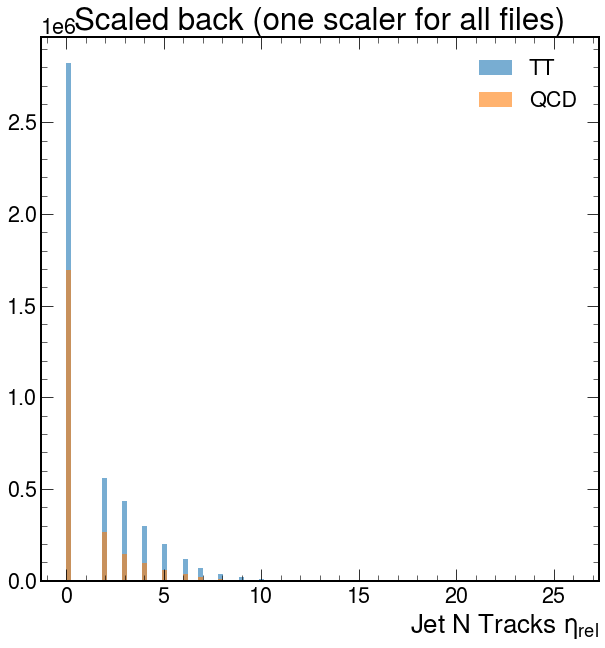

tensor([-0.5884, -0.5884, -0.5884,  ..., -0.5884, -0.5884, -0.5884],
       dtype=torch.float16)
tensor([-0.5884,  1.7441, -0.5884,  ...,  0.3450, -0.5884, -0.5884],
       dtype=torch.float16)


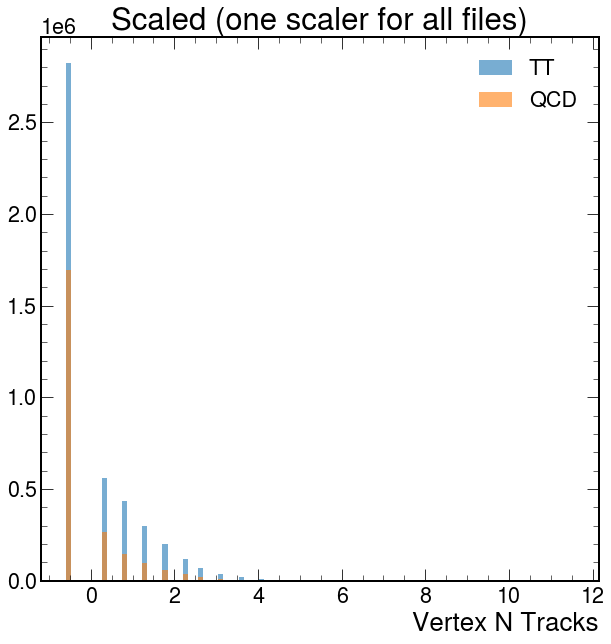

[3.743e-05 3.743e-05 3.743e-05 ... 3.743e-05 3.743e-05 3.743e-05]
[3.743e-05 5.000e+00 3.743e-05 ... 2.000e+00 3.743e-05 3.743e-05]


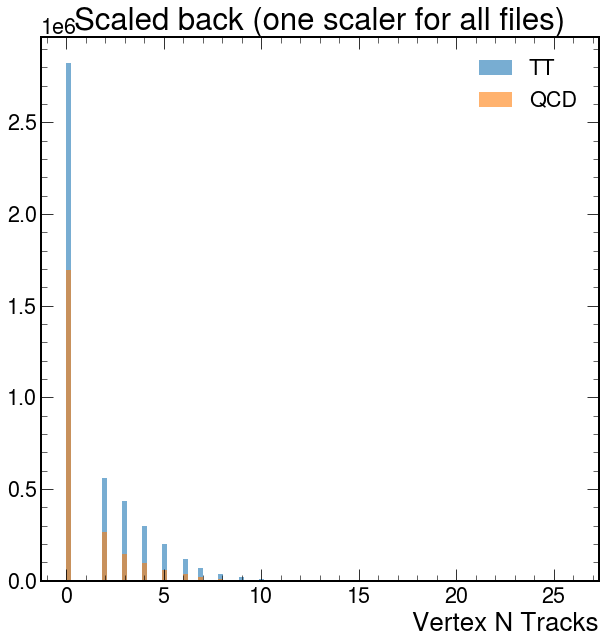

In [41]:
for prop in range(63,67):
    scaler = torch.load(f'/hpcwork/um106329/june_21/scaler_{prop}_with_default_{default}.pt')
    tt_scaled = tt_example[:,prop]
    print(tt_scaled)
    plt.hist(tt_scaled.numpy(), bins = 100, alpha=0.6)
    qcd_scaled = qcd_example[:,prop]
    print(qcd_scaled)
    plt.hist(qcd_scaled.numpy(), bins = 100, alpha=0.6)
    plt.xlabel(display_names[prop])
    plt.title('Scaled (one scaler for all files)')
    plt.legend(['TT', 'QCD'])
    plt.show()
    scaled_back = scaler.inverse_transform(tt_scaled)
    print(scaled_back)
    plt.hist(scaled_back, bins = 100, alpha=0.6)
    scaled_back = scaler.inverse_transform(qcd_scaled)
    print(scaled_back)
    plt.hist(scaled_back, bins = 100, alpha=0.6)
    plt.xlabel(display_names[prop])
    plt.title('Scaled back (one scaler for all files)')
    plt.legend(['TT', 'QCD'])
    plt.show()

## Comparison: may_21

In [30]:
train_input_file_paths_may21 = [f'/hpcwork/um106329/may_21/scaled_QCD/train_inputs_%d_with_default_{default}.pt' % k for k in range(0,min(NUM_DATASETS,229))] + [f'/hpcwork/um106329/may_21/scaled_TT/train_inputs_%d_with_default_{default}.pt' % k for k in range(0,max(NUM_DATASETS-229,0))]

In [33]:
qcd_example_may21 = torch.load(train_input_file_paths_may21[0])
tt_example_may21 = torch.load(train_input_file_paths_may21[-1])
qcd_scaler_may21 = torch.load(f'/hpcwork/um106329/may_21/scaled_QCD/scalers_0_with_default_{default}.pt')
tt_scaler_may21 = torch.load(f'/hpcwork/um106329/may_21/scaled_TT/scalers_48_with_default_{default}.pt')

tensor([-0.6787, -0.6787, -0.6787,  ..., -0.6787, -0.6787, -0.6787],
       dtype=torch.float16)
tensor([-0.5474,  1.3105, -0.5474,  ...,  1.3105, -0.5474, -0.5474],
       dtype=torch.float16)


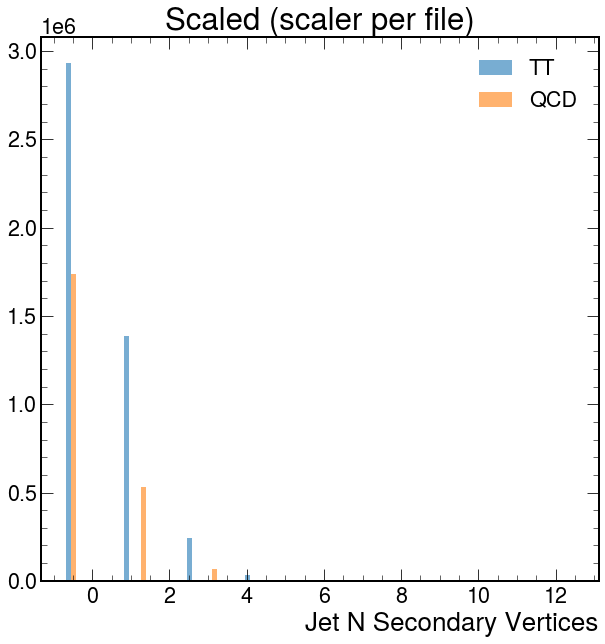

[1.58e-05 1.58e-05 1.58e-05 ... 1.58e-05 1.58e-05 1.58e-05]
[-7.612e-05  9.995e-01 -7.612e-05 ...  9.995e-01 -7.612e-05 -7.612e-05]


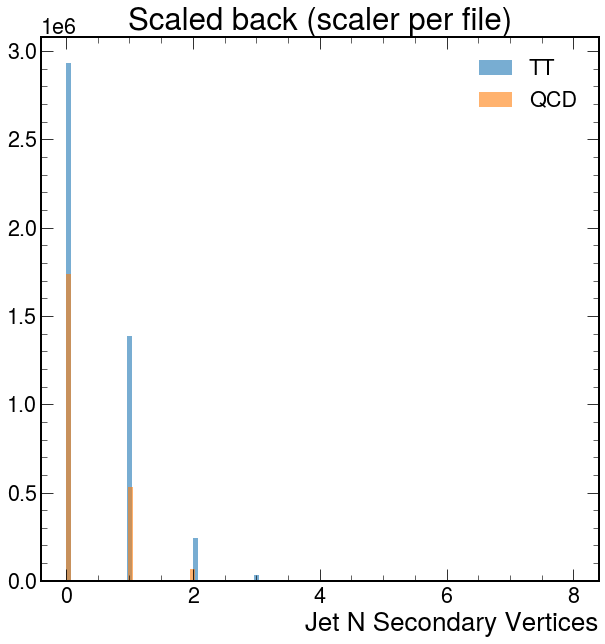

tensor([-0.7031, -0.2500, -0.2500,  ...,  0.6562,  1.1094, -1.1562],
       dtype=torch.float16)
tensor([-0.2771,  0.5229,  0.9233,  ..., -1.0771, -1.4775,  0.9233],
       dtype=torch.float16)


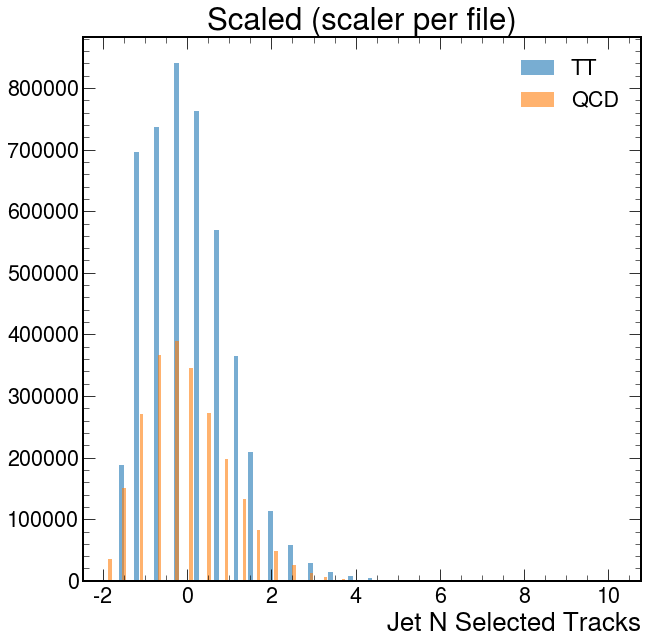

[2.    3.    3.    ... 5.    6.    0.999]
[4.     6.     7.     ... 2.002  0.9995 7.    ]


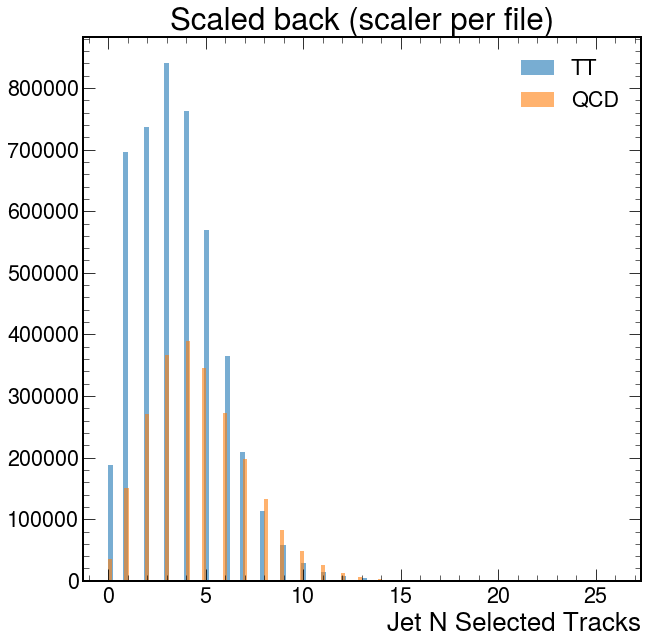

tensor([-0.6665, -0.6665, -0.6665,  ..., -0.6665, -0.6665, -0.6665],
       dtype=torch.float16)
tensor([-0.5269,  2.2246, -0.5269,  ...,  0.5737, -0.5269, -0.5269],
       dtype=torch.float16)


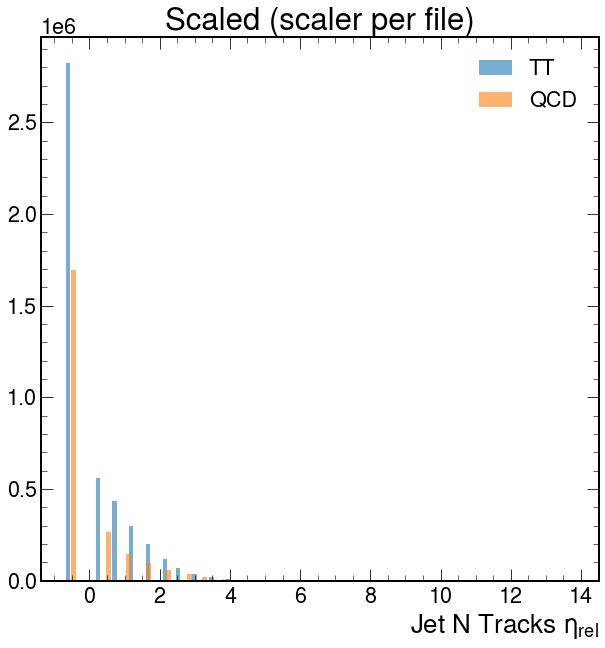

[-0.0003035 -0.0003035 -0.0003035 ... -0.0003035 -0.0003035 -0.0003035]
[-3.066e-04  5.000e+00 -3.066e-04 ...  2.000e+00 -3.066e-04 -3.066e-04]


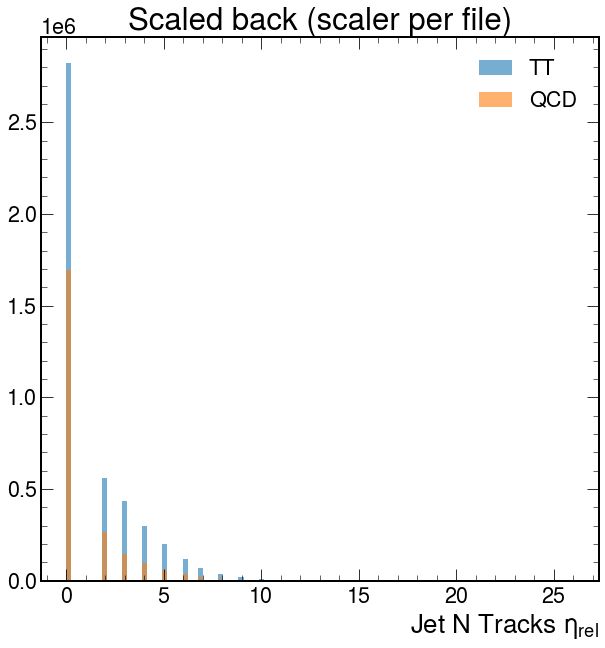

tensor([-0.6665, -0.6665, -0.6665,  ..., -0.6665, -0.6665, -0.6665],
       dtype=torch.float16)
tensor([-0.5269,  2.2246, -0.5269,  ...,  0.5737, -0.5269, -0.5269],
       dtype=torch.float16)


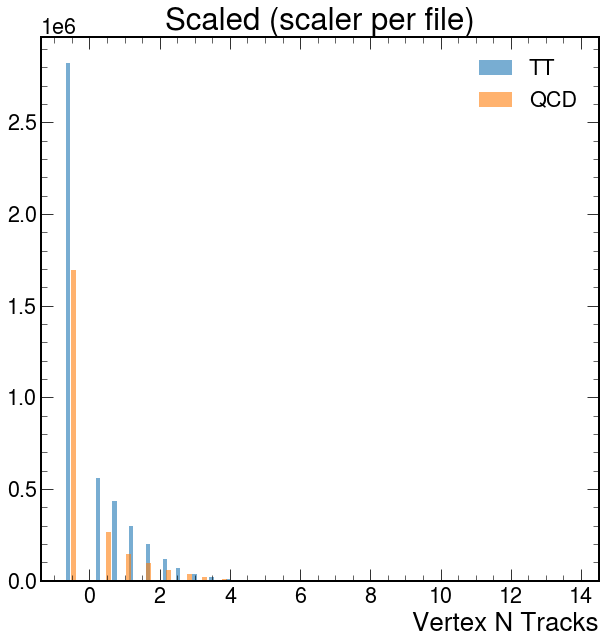

[-0.0003035 -0.0003035 -0.0003035 ... -0.0003035 -0.0003035 -0.0003035]
[-3.066e-04  5.000e+00 -3.066e-04 ...  2.000e+00 -3.066e-04 -3.066e-04]


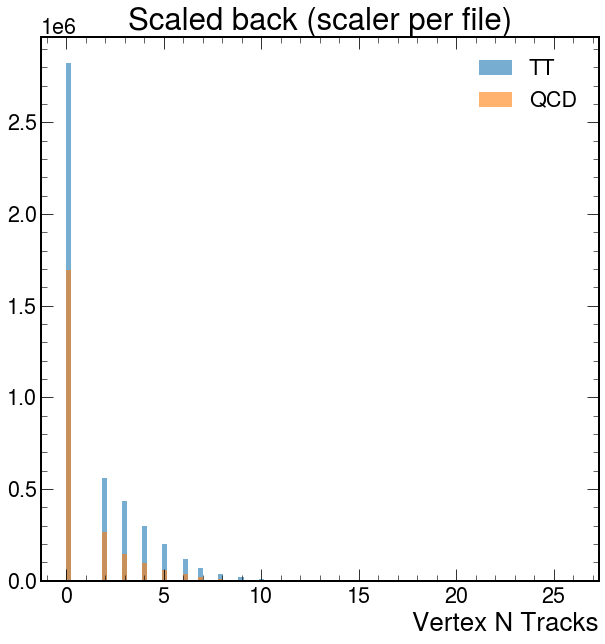

In [40]:
for prop in range(63,67):
    tt_scaled_may21 = tt_example_may21[:,prop]
    print(tt_scaled_may21)
    plt.hist(tt_scaled_may21.numpy(), bins = 100, alpha=0.6)
    qcd_scaled_may21 = qcd_example_may21[:,prop]
    print(qcd_scaled_may21)
    plt.hist(qcd_scaled_may21.numpy(), bins = 100, alpha=0.6)
    plt.xlabel(display_names[prop])
    plt.title('Scaled (scaler per file)')
    plt.legend(['TT', 'QCD'])
    plt.show()
    scaled_back_may21 = tt_scaler_may21[prop].inverse_transform(tt_scaled_may21)
    print(scaled_back_may21)
    plt.hist(scaled_back_may21, bins = 100, alpha=0.6)
    scaled_back_may21 = qcd_scaler_may21[prop].inverse_transform(qcd_scaled_may21)
    print(scaled_back_may21)
    plt.hist(scaled_back_may21, bins = 100, alpha=0.6)
    plt.xlabel(display_names[prop])
    plt.title('Scaled back (scaler per file)')
    plt.legend(['TT', 'QCD'])
    plt.show()